# Trailforks Washington MTB Trails Scraping

## Trailforks Scrapy Script

In [1]:
import re
import scrapy
from scrapy.crawler import CrawlerProcess

In [2]:
class TforkSpider(scrapy.Spider):

    name = 'TFORKS'

    start_urls = [
        'https://www.trailforks.com/region/washington/trails/?activitytype=1'
    ]

    def parse(self, response):

        #looping through the rows of data stored in the table
        for row in response.xpath("//table[@id='trails_table']//tbody//tr"):
            yield {
                'trail_url':row.xpath("td[2]//a//@href").get(default='BUMMER'),
                'trail':row.xpath("td[2]//a//text()").get(default='BUMMER'),
                'difficulty':row.xpath("td[3]//span//@title").get(default='BUMMER'),
                'trail_center':row.xpath("td[4]//a//text()").get(default='BUMMER'),
                'rating':row.xpath("td[5]//ul//@title").get(default='BUMMER'),
                'distance':row.xpath("td[6]//text()").get(default='BUMMER'),
                'descent':row.xpath("td[7]//text()").get(default='BUMMER')
            }

        next_page = response.xpath("//ul/li[@class='next-page']/a/@href").get()

        if next_page is not None:
            next_page = response.urljoin(next_page)
            yield scrapy.Request(next_page, callback=self.parse)

In [4]:
# being a good scraper & providing email if there are issues
# i really didnt want to get banned since I use the site regularly
process = CrawlerProcess({
    'FEED_FORMAT':'json',
    'FEED_URI':'tforks_wash_mtbtrails_v2.json',
    'LOG_ENABLED':True,
    'ROBOTSTXT_OBEY':True,
    'USER_AGENT':'SchoolProjectCrawler (brienw7@gmail.com)',
    'AUTOTHROTTLE_ENABLED':True,
    'HTTPCACHE_ENABLED':True
})

2019-09-15 13:09:02 [scrapy.utils.log] INFO: Scrapy 1.7.3 started (bot: scrapybot)
2019-09-15 13:09:02 [scrapy.utils.log] INFO: Versions: lxml 4.2.5.0, libxml2 2.9.8, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 19.7.0, Python 3.7.1 (default, Dec 14 2018, 13:28:58) - [Clang 4.0.1 (tags/RELEASE_401/final)], pyOpenSSL 18.0.0 (OpenSSL 1.1.1a  20 Nov 2018), cryptography 2.4.2, Platform Darwin-18.6.0-x86_64-i386-64bit


In [5]:
process.crawl(TforkSpider)
process.start()
print('Hooray! First Scraping Done!')

2019-09-15 13:09:04 [scrapy.crawler] INFO: Overridden settings: {'AUTOTHROTTLE_ENABLED': True, 'FEED_FORMAT': 'json', 'FEED_URI': 'tforks_wash_mtbtrails_v2.json', 'HTTPCACHE_ENABLED': True, 'ROBOTSTXT_OBEY': True, 'USER_AGENT': 'SchoolProjectCrawler (brienw7@gmail.com)'}
2019-09-15 13:09:04 [scrapy.extensions.telnet] INFO: Telnet Password: f3a8dc91207edadc
2019-09-15 13:09:04 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.logstats.LogStats',
 'scrapy.extensions.throttle.AutoThrottle']
2019-09-15 13:09:04 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.robotstxt.RobotsTxtMiddleware',
 'scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.DownloadTimeoutMiddleware',
 'scrapy.downloadermiddlewares.defaulthe

2019-09-15 13:09:04 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1>
{'trail_url': 'https://www.trailforks.com/trails/100-acre-wood-trail-158713/', 'trail': '100 Acre Wood trail', 'difficulty': 'Easy / Green Circle', 'trail_center': '100 Acre Woods', 'rating': '0/100', 'distance': '1,439 ft', 'descent': '-31 ft'}
2019-09-15 13:09:04 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1>
{'trail_url': 'https://www.trailforks.com/trails/100-acre-wood-trail-158706/', 'trail': '100 Acre Wood Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': '100 Acre Woods', 'rating': '0/100', 'distance': '538 ft', 'descent': '-9 ft'}
2019-09-15 13:09:04 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1>
{'trail_url': 'https://www.trailforks.com/trails/100-acre-wood-trail-158721/', 'trail': '100 Acr

2019-09-15 13:09:04 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1>
{'trail_url': 'https://www.trailforks.com/trails/116/', 'trail': '116', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Anacortes Community Forest Lands', 'rating': '0/100', 'distance': '2,558 ft', 'descent': '-183 ft'}
2019-09-15 13:09:04 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1>
{'trail_url': 'https://www.trailforks.com/trails/117/', 'trail': '117', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Anacortes Community Forest Lands', 'rating': '60/100 with 1 vote', 'distance': '1,412 ft', 'descent': '-146 ft'}
2019-09-15 13:09:04 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1>
{'trail_url': 'https://www.trailforks.com/trails/118-kick-ass/', 'trail': '118 - Kick Ass', 'difficulty': 'Very D

2019-09-15 13:09:04 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1>
{'trail_url': 'https://www.trailforks.com/trails/187/', 'trail': '187', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Galbraith', 'rating': '72/100 with 5 votes', 'distance': '1,917 ft', 'descent': '-109 ft'}
2019-09-15 13:09:04 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1>
{'trail_url': 'https://www.trailforks.com/trails/19th-street-crossover/', 'trail': '19th Street Crossover', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Japanese Gulch', 'rating': '50/100 with 2 votes', 'distance': '560 ft', 'descent': '-2 ft'}
2019-09-15 13:09:04 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1>
{'trail_url': 'https://www.trailforks.com/trails/2-1-2/', 'trail': '2 1/2', 'difficulty': 'Easy / Green Cir

2019-09-15 13:09:04 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1>
{'trail_url': 'https://www.trailforks.com/trails/219/', 'trail': '219', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Anacortes', 'rating': '60/100 with 1 vote', 'distance': '1,062 ft', 'descent': '-85 ft'}
2019-09-15 13:09:04 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1>
{'trail_url': 'https://www.trailforks.com/trails/220-89543/', 'trail': '220', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Anacortes Community Forest Lands', 'rating': '80/100 with 2 votes', 'distance': '3,267 ft', 'descent': '-161 ft'}
2019-09-15 13:09:04 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1>
{'trail_url': 'https://www.trailforks.com/trails/221/', 'trail': '221', 'difficulty': 'Intermediate / Blue Square

2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=2>
{'trail_url': 'https://www.trailforks.com/trails/247-89556/', 'trail': '247', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Anacortes Community Forest Lands', 'rating': '80/100 with 4 votes', 'distance': '2 miles', 'descent': '-540 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=2>
{'trail_url': 'https://www.trailforks.com/trails/249/', 'trail': '249', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Anacortes', 'rating': '0/100', 'distance': '4,673 ft', 'descent': '-240 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=2>
{'trail_url': 'https://www.trailforks.com/trails/249-hl-road-to-220/', 'trail': '249 HL road to 220', 'di

2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=2>
{'trail_url': 'https://www.trailforks.com/trails/308/', 'trail': '308', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Anacortes Community Forest Lands', 'rating': '0/100', 'distance': '480 ft', 'descent': '-39 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=2>
{'trail_url': 'https://www.trailforks.com/trails/309-145065/', 'trail': '309', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Anacortes Community Forest Lands', 'rating': '0/100', 'distance': '1,363 ft', 'descent': '-168 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=2>
{'trail_url': 'https://www.trailforks.com/trails/310/', 'trail': '310', 'difficulty': 'Intermediate /

2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=2>
{'trail_url': 'https://www.trailforks.com/trails/88th-street-trail/', 'trail': '88th street trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Nike Park', 'rating': '0/100', 'distance': '782 ft', 'descent': '-3 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=2>
{'trail_url': 'https://www.trailforks.com/trails/911-9779/', 'trail': '911', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Galbraith', 'rating': '82/100 with 19 votes', 'distance': '2,263 ft', 'descent': '-224 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=2>
{'trail_url': 'https://www.trailforks.com/trails/963/', 'trail': '963', 'difficulty': 'Intermediate / Blue Square'

2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=2>
{'trail_url': 'https://www.trailforks.com/trails/addie-venture/', 'trail': 'Addie Venture', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Willis D. Tucker Community Park', 'rating': '0/100', 'distance': '391 ft', 'descent': '-4 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=2>
{'trail_url': 'https://www.trailforks.com/trails/adenauer-forst/', 'trail': 'Adenauer Forst', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Teanaway Community Forest', 'rating': '80/100 with 1 vote', 'distance': '3,704 ft', 'descent': '-439 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=2>
{'trail_url': 'https://www.trailforks.com/trails/aft-loading/', 'trai

2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=2>
{'trail_url': 'https://www.trailforks.com/trails/alpine-baldy-trail/', 'trail': 'Alpine Baldy Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Skykomish', 'rating': '83/100 with 6 votes', 'distance': '7 miles', 'descent': '-1,400 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=2>
{'trail_url': 'https://www.trailforks.com/trails/alpine-meadows/', 'trail': 'Alpine Meadows', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Wenatchee', 'rating': '0/100', 'distance': '4 miles', 'descent': '-2,482 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=2>
{'trail_url': 'https://www.trailforks.com/trails/alt-xc/', 'trail': 'Alt XC', 'diff

2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=3>
{'trail_url': 'https://www.trailforks.com/trails/arena-trail/', 'trail': 'Arena Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Pilchuck Tree Farm', 'rating': '80/100 with 1 vote', 'distance': '1,812 ft', 'descent': '-110 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=3>
{'trail_url': 'https://www.trailforks.com/trails/army-rd-tie/', 'trail': 'Army Rd Tie', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Capitol Forest', 'rating': '0/100', 'distance': '3,740 ft', 'descent': '-25 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=3>
{'trail_url': 'https://www.trailforks.com/trails/around-the-lake/', 'trail': 'Around The Lake', 'dif

2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=3>
{'trail_url': 'https://www.trailforks.com/trails/axis-of-access/', 'trail': 'Axis of Access', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'VIrginian Ridge', 'rating': '60/100 with 1 vote', 'distance': '2,176 ft', 'descent': '-46 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=3>
{'trail_url': 'https://www.trailforks.com/trails/b-ring/', 'trail': 'B Ring', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Ring Hill Forest', 'rating': '0/100', 'distance': '3,399 ft', 'descent': '-84 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=3>
{'trail_url': 'https://www.trailforks.com/trails/b-l-rings-access-connector-to-bike-park/', 'trail': 'B&L 

2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=3>
{'trail_url': 'https://www.trailforks.com/trails/backstreet/', 'trail': 'Backstreet', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Willis D. Tucker Community Park', 'rating': '0/100', 'distance': '1,306 ft', 'descent': '-40 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=3>
{'trail_url': 'https://www.trailforks.com/trails/backyard-bbq-184161/', 'trail': 'Backyard BBQ', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Willis D. Tucker Community Park', 'rating': '0/100', 'distance': '908 ft', 'descent': '-16 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=3>
{'trail_url': 'https://www.trailforks.com/trails/bad-wolf/', 'trail': 'Bad Wolf', 'dif

2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=3>
{'trail_url': 'https://www.trailforks.com/trails/bdoslake-sawyer-connector/', 'trail': 'BDOS-Lake Sawyer Connector', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Black Diamond Open Space', 'rating': '0/100', 'distance': '280 ft', 'descent': 'BUMMER'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=3>
{'trail_url': 'https://www.trailforks.com/trails/beach-campground-trail/', 'trail': 'Beach Campground Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Fort Warden State Park', 'rating': '0/100', 'distance': '1,377 ft', 'descent': '-217 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=3>
{'trail_url': 'https://www.trailforks.com/trails/beach-tr

2019-09-15 13:09:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.trailforks.com/region/washington/trails/?activitytype=1&page=4> (referer: https://www.trailforks.com/region/washington/trails/?activitytype=1&page=3) ['cached']
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=4>
{'trail_url': 'https://www.trailforks.com/trails/beaver-pond-trail-68510/', 'trail': 'Beaver Pond Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Sun Mountain', 'rating': '40/100 with 1 vote', 'distance': '1 miles', 'descent': '-68 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=4>
{'trail_url': 'https://www.trailforks.com/trails/beaver-pond-trail-106459/', 'trail': 'Beaver Pond Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Port Gamble Forest Heritage Park', 'rating': '60/100 wi

2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=4>
{'trail_url': 'https://www.trailforks.com/trails/bfd/', 'trail': 'BFD', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Green Mountain', 'rating': '60/100 with 1 vote', 'distance': '1,503 ft', 'descent': '-377 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=4>
{'trail_url': 'https://www.trailforks.com/trails/bfg/', 'trail': 'BFG', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Teanaway Community Forest', 'rating': '0/100', 'distance': '2,777 ft', 'descent': '-9 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=4>
{'trail_url': 'https://www.trailforks.com/trails/biff-164699/', 'trail': 'Biff', 'difficulty': 'Intermediate / Blue Square

2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=4>
{'trail_url': 'https://www.trailforks.com/trails/big-tree/', 'trail': 'Big Tree', 'difficulty': 'Extremely Difficult / Dbl Black Diamond', 'trail_center': 'Duthie Hill Mountain Bike Park', 'rating': '78/100 with 8 votes', 'distance': '2 miles', 'descent': '-80 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=4>
{'trail_url': 'https://www.trailforks.com/trails/big-valley-trail-68520/', 'trail': 'Big Valley Trail', 'difficulty': 'Easiest / White Circle', 'trail_center': 'Winthrop', 'rating': '0/100', 'distance': '4 miles', 'descent': '-282 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=4>
{'trail_url': 'https://www.trailforks.com/trails/bigler/', 'trail': '

2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=4>
{'trail_url': 'https://www.trailforks.com/trails/blind-pig/', 'trail': 'Blind Pig', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Black Diamond Open Space', 'rating': '33/100 with 3 votes', 'distance': '1,786 ft', 'descent': '-112 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=4>
{'trail_url': 'https://www.trailforks.com/trails/blind-pig-148453/', 'trail': 'Blind Pig', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Black Diamond Open Space', 'rating': '0/100', 'distance': '369 ft', 'descent': '-34 ft'}
2019-09-15 13:09:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=4>
{'trail_url': 'https://www.trailforks.com/trails/blind-pig-148452/', 't

2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=4>
{'trail_url': 'https://www.trailforks.com/trails/bluff-trail-24/', 'trail': 'Bluff Trail #24', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Lewis River', 'rating': '0/100', 'distance': '2 miles', 'descent': '-6 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=4>
{'trail_url': 'https://www.trailforks.com/trails/bluff-trail-cutoff/', 'trail': 'Bluff Trail Cutoff', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Miller Peninsula State Park', 'rating': '0/100', 'distance': '2,021 ft', 'descent': 'BUMMER'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=4>
{'trail_url': 'https://www.trailforks.com/trails/bluffs-to-huckleberry/', 'trail': 'Bluff

2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=5>
{'trail_url': 'https://www.trailforks.com/trails/bolt-151930/', 'trail': 'Bolt', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Willis D. Tucker Community Park', 'rating': '60/100 with 1 vote', 'distance': '1,375 ft', 'descent': '-40 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=5>
{'trail_url': 'https://www.trailforks.com/trails/bomber/', 'trail': 'Bomber', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Beacon Hill', 'rating': '91/100 with 7 votes', 'distance': '3,553 ft', 'descent': '-410 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=5>
{'trail_url': 'https://www.trailforks.com/trails/bonaparte-trail-306/', 'trail': 'Bonapar

2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=5>
{'trail_url': 'https://www.trailforks.com/trails/boulder-de-roux-1392-boulder-side/', 'trail': 'Boulder De Roux #1392 (Boulder side)', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Teanaway', 'rating': '90/100 with 2 votes', 'distance': '4 miles', 'descent': '-193 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=5>
{'trail_url': 'https://www.trailforks.com/trails/boulder-summit-trail-south/', 'trail': 'Boulder Summit Trail South', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Boulder Creek Summit Trail', 'rating': '0/100', 'distance': '1 miles', 'descent': '-86 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=5>
{'trail_url

2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=5>
{'trail_url': 'https://www.trailforks.com/trails/braveheart-17834/', 'trail': 'BraveHeart', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Duthie Hill Mountain Bike Park', 'rating': '76/100 with 20 votes', 'distance': '2 miles', 'descent': '-102 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=5>
{'trail_url': 'https://www.trailforks.com/trails/brazilian/', 'trail': 'Brazilian', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Dry Hill', 'rating': '72/100 with 5 votes', 'distance': '3,433 ft', 'descent': '-269 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=5>
{'trail_url': 'https://www.trailforks.com/trails/brer-rabbit/', 'tr

2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=5>
{'trail_url': 'https://www.trailforks.com/trails/buckrabbit/', 'trail': 'Buckrabbit', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Ephrata', 'rating': '100/100 with 3 votes', 'distance': '1 miles', 'descent': '-152 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=5>
{'trail_url': 'https://www.trailforks.com/trails/buffer/', 'trail': 'Buffer', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Willis D. Tucker Community Park', 'rating': '0/100', 'distance': '1,430 ft', 'descent': '-72 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=5>
{'trail_url': 'https://www.trailforks.com/trails/bugs-bunny-in-a-dress/', 'trail': 'bugs bunny in a dress

2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=5>
{'trail_url': 'https://www.trailforks.com/trails/bypass-34040/', 'trail': 'Bypass', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Tokul West', 'rating': '55/100 with 4 votes', 'distance': '1,071 ft', 'descent': '-5 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=5>
{'trail_url': 'https://www.trailforks.com/trails/bypass-shelterbelt/', 'trail': 'ByPass Shelterbelt', 'difficulty': 'Easiest / White Circle', 'trail_center': 'Richland', 'rating': '0/100', 'distance': '5 miles', 'descent': '-90 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=5>
{'trail_url': 'https://www.trailforks.com/trails/bypass-trail-69215/', 'trail': 'Bypass Trail', 'difficulty': 

2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=6>
{'trail_url': 'https://www.trailforks.com/trails/capitol-peak/', 'trail': 'Capitol Peak', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Capitol Forest', 'rating': '70/100 with 2 votes', 'distance': '1 miles', 'descent': '-450 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=6>
{'trail_url': 'https://www.trailforks.com/trails/capitulate/', 'trail': 'Capitulate', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Port Orchard', 'rating': '100/100 with 1 vote', 'distance': '1 miles', 'descent': '-67 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=6>
{'trail_url': 'https://www.trailforks.com/trails/captain-stinky-pants/', 'trail': 

2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=6>
{'trail_url': 'https://www.trailforks.com/trails/cedar-cone-lollipop-loop/', 'trail': 'Cedar Cone Lollipop Loop', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Ring Hill Forest', 'rating': '0/100', 'distance': '1,858 ft', 'descent': '-31 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=6>
{'trail_url': 'https://www.trailforks.com/trails/cedar-dust/', 'trail': 'Cedar Dust', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Galbraith', 'rating': '75/100 with 24 votes', 'distance': '2,902 ft', 'descent': '-54 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=6>
{'trail_url': 'https://www.trailforks.com/trails/cedar-dust-black-jump-line/', 'tr

2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=6>
{'trail_url': 'https://www.trailforks.com/trails/chapel-spur/', 'trail': 'Chapel Spur', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Lacamas Park', 'rating': '0/100', 'distance': '1,546 ft', 'descent': '-116 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=6>
{'trail_url': 'https://www.trailforks.com/trails/chapel-spur-boulder-fields/', 'trail': 'Chapel Spur Boulder Fields', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Lacamas Park', 'rating': '100/100 with 1 vote', 'distance': '449 ft', 'descent': '-19 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=6>
{'trail_url': 'https://www.trailforks.com/trails/charlotte-s-trail-85564

2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=6>
{'trail_url': 'https://www.trailforks.com/trails/chinese-gardens-trail/', 'trail': 'Chinese Gardens Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Fort Warden State Park', 'rating': '0/100', 'distance': '4,118 ft', 'descent': '-46 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=6>
{'trail_url': 'https://www.trailforks.com/trails/chinook-creek-siouxon-trail-connector/', 'trail': 'Chinook Creek - Siouxon Trail Connector', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Siouxon Area', 'rating': '0/100', 'distance': '1,347 ft', 'descent': '-111 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=6>
{'trail_url': 'https://www.trailforks.com/tr

2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=7>
{'trail_url': 'https://www.trailforks.com/trails/cle-elum-bike-park/', 'trail': 'Cle Elum Bike Park', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Cle Elum', 'rating': '70/100 with 2 votes', 'distance': '3,874 ft', 'descent': '-253 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=7>
{'trail_url': 'https://www.trailforks.com/trails/cle-elum-ridge-dh/', 'trail': 'Cle Elum Ridge DH ', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Taneum Canyon', 'rating': '0/100', 'distance': '2 miles', 'descent': '-673 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=7>
{'trail_url': 'https://www.trailforks.com/trails/cle-elum-ridge-trai

2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=7>
{'trail_url': 'https://www.trailforks.com/trails/coldwater-trail-230/', 'trail': 'Coldwater Trail #230', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Coldwater Lake / Mt Margaret', 'rating': '60/100 with 1 vote', 'distance': '4 miles', 'descent': '-546 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=7>
{'trail_url': 'https://www.trailforks.com/trails/colmans/', 'trail': 'Colmans', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'State Patrol Trails', 'rating': '0/100', 'distance': '2,791 ft', 'descent': '-1 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=7>
{'trail_url': 'https://www.trailforks.com/trails/columbia-148688/', 'tr

2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=7>
{'trail_url': 'https://www.trailforks.com/trails/connector-49558/', 'trail': 'Connector', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Tolt MacDonald Park', 'rating': '0/100', 'distance': '241 ft', 'descent': '-7 ft'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=7>
{'trail_url': 'https://www.trailforks.com/trails/connector-113484/', 'trail': 'Connector', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Japanese Gulch', 'rating': '0/100', 'distance': '163 ft', 'descent': 'BUMMER'}
2019-09-15 13:09:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=7>
{'trail_url': 'https://www.trailforks.com/trails/connector-208566/', 'trail': 'Connector', 'difficulty': 'Interme

2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=7>
{'trail_url': 'https://www.trailforks.com/trails/cooper-river/', 'trail': 'Cooper River', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Salmon La Sac', 'rating': '60/100 with 1 vote', 'distance': '6 miles', 'descent': '-1,141 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=7>
{'trail_url': 'https://www.trailforks.com/trails/cooper-s-run/', 'trail': "Cooper's Run", 'difficulty': 'Easy / Green Circle', 'trail_center': 'Pilchuck Tree Farm', 'rating': '0/100', 'distance': '656 ft', 'descent': '-48 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=7>
{'trail_url': 'https://www.trailforks.com/trails/corall-trail/', 'trail': 'Corall Trail', 'dif

2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=7>
{'trail_url': 'https://www.trailforks.com/trails/county-line-trail-east/', 'trail': 'County Line Trail (East)', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Teanaway', 'rating': '40/100 with 1 vote', 'distance': '2 miles', 'descent': '-1,146 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=7>
{'trail_url': 'https://www.trailforks.com/trails/cousin-eddie/', 'trail': 'Cousin Eddie', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Montesano City Forest', 'rating': '100/100 with 3 votes', 'distance': '1,463 ft', 'descent': '-240 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=7>
{'trail_url': 'https://www.trailforks.com/trails/

2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=8>
{'trail_url': 'https://www.trailforks.com/trails/creature-36540/', 'trail': 'Creature', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Lake Sawyer', 'rating': '0/100', 'distance': '674 ft', 'descent': '-24 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=8>
{'trail_url': 'https://www.trailforks.com/trails/creature-comfort/', 'trail': 'Creature Comfort', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Squilchuck State Park', 'rating': '87/100 with 3 votes', 'distance': '2 miles', 'descent': '-829 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=8>
{'trail_url': 'https://www.trailforks.com/trails/creek-bed-trail/', 'trail': 'Creek Bed Trai

2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=8>
{'trail_url': 'https://www.trailforks.com/trails/crossover-trail/', 'trail': 'Crossover Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Lord Hill Regional Park', 'rating': '60/100 with 3 votes', 'distance': '1,540 ft', 'descent': '-46 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=8>
{'trail_url': 'https://www.trailforks.com/trails/crossover-trail-not-named/', 'trail': 'Crossover trail (not named)', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Mukilteo', 'rating': '0/100', 'distance': '272 ft', 'descent': '-8 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=8>
{'trail_url': 'https://www.trailforks.com/trails/crow-hill/', 'tra

2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=8>
{'trail_url': 'https://www.trailforks.com/trails/cussed-hollow-trail-19/', 'trail': 'Cussed Hollow Trail #19', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Dark Divide', 'rating': '0/100', 'distance': '4 miles', 'descent': '-705 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=8>
{'trail_url': 'https://www.trailforks.com/trails/custards-chimney/', 'trail': 'Custards Chimney', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Whipple Creek Park', 'rating': '0/100', 'distance': '2,569 ft', 'descent': '-120 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=8>
{'trail_url': 'https://www.trailforks.com/trails/cuthroat-lake-trail/', 'trail': 'C

2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=8>
{'trail_url': 'https://www.trailforks.com/trails/dash-point-access/', 'trail': 'Dash Point Access', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Dash Point', 'rating': '0/100', 'distance': '838 ft', 'descent': '-49 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=8>
{'trail_url': 'https://www.trailforks.com/trails/dash-point-highlands-access/', 'trail': 'Dash Point Highlands Access', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Dash Point', 'rating': '0/100', 'distance': '658 ft', 'descent': '-39 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=8>
{'trail_url': 'https://www.trailforks.com/trails/dave-s-dive-78300/', 'trail': "Dave's Dive",

2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=8>
{'trail_url': 'https://www.trailforks.com/trails/deer-park-trail-148694/', 'trail': 'Deer Park Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Snoqualmie Ridge', 'rating': '0/100', 'distance': '1 miles', 'descent': '-147 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=8>
{'trail_url': 'https://www.trailforks.com/trails/deer-park-trail/', 'trail': 'Deer Park Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Snoqualmie Ridge', 'rating': '100/100 with 1 vote', 'distance': '2,661 ft', 'descent': '-116 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=8>
{'trail_url': 'https://www.trailforks.com/trails/deer-park-trail-148695/', 'trail':

2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=9>
{'trail_url': 'https://www.trailforks.com/trails/diamond-point-trail-103014/', 'trail': 'Diamond Point Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Miller Peninsula State Park', 'rating': '0/100', 'distance': '1 miles', 'descent': '-90 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=9>
{'trail_url': 'https://www.trailforks.com/trails/diamond-point-trail/', 'trail': 'Diamond Point Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Miller Peninsula State Park', 'rating': '0/100', 'distance': '1 miles', 'descent': '-7 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=9>
{'trail_url': 'https://www.trailforks.com/trails/

2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=9>
{'trail_url': 'https://www.trailforks.com/trails/dnr-to-mpca-196610/', 'trail': 'DNR to MPCA', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Mica Peak Conservation Area', 'rating': '0/100', 'distance': '2 miles', 'descent': '-36 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=9>
{'trail_url': 'https://www.trailforks.com/trails/do-loop/', 'trail': 'Do Loop', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Soaring Eagle Park', 'rating': '0/100', 'distance': '1,909 ft', 'descent': '-18 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=9>
{'trail_url': 'https://www.trailforks.com/trails/doc/', 'trail': 'Doc', 'difficulty': 'Easy / Green Circle', '

2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=9>
{'trail_url': 'https://www.trailforks.com/trails/double-black-walk-up/', 'trail': 'Double Black walk up', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Chuckanut Mountain', 'rating': '0/100', 'distance': '464 ft', 'descent': 'BUMMER'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=9>
{'trail_url': 'https://www.trailforks.com/trails/double-bypass-20649/', 'trail': 'Double Bypass', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Dry Hill', 'rating': '80/100 with 5 votes', 'distance': '1,282 ft', 'descent': '-302 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=9>
{'trail_url': 'https://www.trailforks.com/trails/double-d-131417/', 'tra

2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=9>
{'trail_url': 'https://www.trailforks.com/trails/dr-john/', 'trail': 'Dr. John', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Banner Forest', 'rating': '0/100', 'distance': '3,626 ft', 'descent': '-40 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=9>
{'trail_url': 'https://www.trailforks.com/trails/dragon-fly-110247/', 'trail': 'Dragon Fly', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Port Orchard', 'rating': '0/100', 'distance': '935 ft', 'descent': '-2 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=9>
{'trail_url': 'https://www.trailforks.com/trails/dragon-tail-180469/', 'trail': 'Dragon Tail', 'difficulty': 'Intermediate / Blue Squ

2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=10>
{'trail_url': 'https://www.trailforks.com/trails/dusty/', 'trail': 'Dusty', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Ancient Lakes', 'rating': '0/100', 'distance': '2 miles', 'descent': '-180 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=10>
{'trail_url': 'https://www.trailforks.com/trails/dusty-south/', 'trail': 'Dusty South', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Ancient Lakes', 'rating': '0/100', 'distance': '1 miles', 'descent': '-53 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=10>
{'trail_url': 'https://www.trailforks.com/trails/dynee-s-tail/', 'trail': "Dynee's Tail", 'difficulty': 'Easy / Green Circle', 'trail_cen

{'trail_url': 'https://www.trailforks.com/trails/east-grand-forest-main-access/', 'trail': 'East Grand Forest Main Access', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Bainbridge Island', 'rating': '0/100', 'distance': '385 ft', 'descent': 'BUMMER'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=10>
{'trail_url': 'https://www.trailforks.com/trails/east-ridge-high/', 'trail': 'East Ridge High', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Leavenworth', 'rating': '0/100', 'distance': '1 miles', 'descent': '-141 ft'}
2019-09-15 13:09:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=10>
{'trail_url': 'https://www.trailforks.com/trails/east-side-trail-117833/', 'trail': 'East Side Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Colville Mountain', 'rating': '0/100', 'distance': '4

2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=10>
{'trail_url': 'https://www.trailforks.com/trails/echos/', 'trail': 'Echos', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Port Orchard', 'rating': '0/100', 'distance': '1,656 ft', 'descent': '-11 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=10>
{'trail_url': 'https://www.trailforks.com/trails/ed-s-crossover/', 'trail': "Ed's Crossover", 'difficulty': 'Easy / Green Circle', 'trail_center': 'St. Edwards Park', 'rating': '0/100', 'distance': '370 ft', 'descent': '-7 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=10>
{'trail_url': 'https://www.trailforks.com/trails/edds-mountain/', 'trail': 'Edds Mountain', 'difficulty': 'Intermediate / Blue Squa

2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=10>
{'trail_url': 'https://www.trailforks.com/trails/english-camp-trail/', 'trail': 'English Camp Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Friday Harbor', 'rating': '0/100', 'distance': '3,945 ft', 'descent': '-144 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=10>
{'trail_url': 'https://www.trailforks.com/trails/english-pond/', 'trail': 'English Pond', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Lord Hill Regional Park', 'rating': '0/100', 'distance': '3,375 ft', 'descent': '-258 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=10>
{'trail_url': 'https://www.trailforks.com/trails/entiat-river-trail/', 'trail': 'Entiat River Tr

2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=10>
{'trail_url': 'https://www.trailforks.com/trails/evolution-alt/', 'trail': 'Evolution Alt', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Galbraith', 'rating': '0/100', 'distance': '486 ft', 'descent': '-97 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=10>
{'trail_url': 'https://www.trailforks.com/trails/ewe-tube/', 'trail': 'Ewe Tube', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Lord Hill Regional Park', 'rating': '98/100 with 10 votes', 'distance': '1,019 ft', 'descent': '-86 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=10>
{'trail_url': 'https://www.trailforks.com/trails/ewok-71392/', 'trail': 'EWOK', 'difficulty': 'Inter

2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=11>
{'trail_url': 'https://www.trailforks.com/trails/faller/', 'trail': 'Faller', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'North Mountain', 'rating': '100/100 with 1 vote', 'distance': '900 ft', 'descent': '-66 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=11>
{'trail_url': 'https://www.trailforks.com/trails/falls-creek-lava-tube-trail/', 'trail': 'Falls Creek Lava Tube Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Falls Creek', 'rating': '0/100', 'distance': '879 ft', 'descent': '-10 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=11>
{'trail_url': 'https://www.trailforks.com/trails/falls-creek-section-1/', 'trail': 'Fa

2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=11>
{'trail_url': 'https://www.trailforks.com/trails/ferry-county-rail-trail/', 'trail': 'Ferry County Rail Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Ferry County Rail Trail', 'rating': '0/100', 'distance': '2,122 ft', 'descent': '-17 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=11>
{'trail_url': 'https://www.trailforks.com/trails/ferry-county-rail-trail-117743/', 'trail': 'Ferry County Rail Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Ferry County Rail Trail', 'rating': '0/100', 'distance': '2 miles', 'descent': '-101 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=11>
{'trail_url': 'https://www.trailforks.com/trails/

2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=11>
{'trail_url': 'https://www.trailforks.com/trails/ferry-county-rail-trail-117738/', 'trail': 'Ferry County Rail Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Ferry County Rail Trail', 'rating': '0/100', 'distance': '4,855 ft', 'descent': '-5 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=11>
{'trail_url': 'https://www.trailforks.com/trails/ferry-county-rail-trail-117745/', 'trail': 'Ferry County Rail Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Ferry County Rail Trail', 'rating': '0/100', 'distance': '3 miles', 'descent': '-36 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=11>
{'trail_url': 'https://www.trailforks.com/tr

2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=11>
{'trail_url': 'https://www.trailforks.com/trails/first-creek-1374/', 'trail': 'First Creek #1374', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Table Mountain', 'rating': '80/100 with 2 votes', 'distance': '5 miles', 'descent': '-2,303 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=11>
{'trail_url': 'https://www.trailforks.com/trails/fish-hook-79522/', 'trail': 'Fish Hook', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Lacamas Park', 'rating': '0/100', 'distance': '342 ft', 'descent': '-35 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=11>
{'trail_url': 'https://www.trailforks.com/trails/fish-lake-trail-142947/', 'tra

2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=11>
{'trail_url': 'https://www.trailforks.com/trails/foggy-dew-trail/', 'trail': 'Foggy Dew Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Angels Staircase / Uno Peak', 'rating': '80/100 with 5 votes', 'distance': '5 miles', 'descent': '-222 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=11>
{'trail_url': 'https://www.trailforks.com/trails/foothills-trail-aka-lone-pine/', 'trail': 'Foothills Trail (aka Lone Pine)', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Sage Hills', 'rating': '40/100 with 1 vote', 'distance': '1 miles', 'descent': '-307 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=11>
{'trail_url': 'https://www.trailf

2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=12>
{'trail_url': 'https://www.trailforks.com/trails/fred-johns/', 'trail': 'Fred Johns', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'State Patrol Trails', 'rating': '100/100 with 1 vote', 'distance': '1 miles', 'descent': '-364 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=12>
{'trail_url': 'https://www.trailforks.com/trails/freeway/', 'trail': 'Freeway', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'State Patrol Trails', 'rating': '80/100 with 1 vote', 'distance': '1 miles', 'descent': '-113 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=12>
{'trail_url': 'https://www.trailforks.com/trails/french-butte-trail-254/', 't

2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=12>
{'trail_url': 'https://www.trailforks.com/trails/fuentes/', 'trail': 'Fuentes', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Willis D. Tucker Community Park', 'rating': '0/100', 'distance': '425 ft', 'descent': '-10 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=12>
{'trail_url': 'https://www.trailforks.com/trails/full-bench/', 'trail': 'Full Bench', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Tokul West', 'rating': '20/100 with 2 votes', 'distance': '3,722 ft', 'descent': '-256 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=12>
{'trail_url': 'https://www.trailforks.com/trails/full-frontal-91428/', 'trail': 'Full Frontal', 'di

2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=12>
{'trail_url': 'https://www.trailforks.com/trails/garter-snake-81289/', 'trail': 'Garter Snake', 'difficulty': 'Easy / Green Circle', 'trail_center': "Henry's Ridge", 'rating': '0/100', 'distance': '966 ft', 'descent': '-22 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=12>
{'trail_url': 'https://www.trailforks.com/trails/gary-laser-eyes-172169/', 'trail': 'Gary Laser Eyes', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Montesano', 'rating': '100/100 with 3 votes', 'distance': '1,885 ft', 'descent': '-315 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=12>
{'trail_url': 'https://www.trailforks.com/trails/gater-75636/', 'trail': 'Gater', 'd

2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=12>
{'trail_url': 'https://www.trailforks.com/trails/glacier-view/', 'trail': 'Glacier view', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Sage Hills', 'rating': '84/100 with 9 votes', 'distance': '2 miles', 'descent': '-581 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=12>
{'trail_url': 'https://www.trailforks.com/trails/glenrose-cliffs/', 'trail': 'Glenrose Cliffs', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Dishman Hills Conservation Area', 'rating': '0/100', 'distance': '2 miles', 'descent': '-718 ft'}
2019-09-15 13:09:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=12>
{'trail_url': 'https://www.trailforks.com/trails/glenrose-cliffs-north-

2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=13>
{'trail_url': 'https://www.trailforks.com/trails/goes-nowhere-in-particular/', 'trail': 'Goes Nowhere in particular', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Crystal Mountain', 'rating': '0/100', 'distance': '675 ft', 'descent': '-184 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=13>
{'trail_url': 'https://www.trailforks.com/trails/gojira/', 'trail': 'Gojira', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Joe Watt Canyon', 'rating': '0/100', 'distance': '4 miles', 'descent': '-458 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=13>
{'trail_url': 'https://www.trailforks.com/trails/gold-creek/', 'trail': 'Gold Creek', 

2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=13>
{'trail_url': 'https://www.trailforks.com/trails/gorge-bound-86235/', 'trail': 'Gorge Bound', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Ancient Lakes', 'rating': '0/100', 'distance': '3 miles', 'descent': '-97 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=13>
{'trail_url': 'https://www.trailforks.com/trails/gorge-climb/', 'trail': 'Gorge Climb', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Ancient Lakes', 'rating': '0/100', 'distance': '2,272 ft', 'descent': 'BUMMER'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=13>
{'trail_url': 'https://www.trailforks.com/trails/goshawk-flats/', 'trail': 'Goshawk Flats', 'difficulty': 'Easy 

2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=13>
{'trail_url': 'https://www.trailforks.com/trails/gravel-bear/', 'trail': 'Gravel Bear', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Gold Bar', 'rating': '0/100', 'distance': '2,807 ft', 'descent': '-72 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=13>
{'trail_url': 'https://www.trailforks.com/trails/gravel-grinder-89076/', 'trail': 'Gravel Grinder', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Dockton Forest', 'rating': '100/100 with 1 vote', 'distance': '1,389 ft', 'descent': '-7 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=13>
{'trail_url': 'https://www.trailforks.com/trails/gravel-pit-access-trail/', 'trail': 'Gravel Pit Access

2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=13>
{'trail_url': 'https://www.trailforks.com/trails/greenline-climb-trail/', 'trail': 'Greenline Climb Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Capitol Forest', 'rating': '90/100 with 2 votes', 'distance': '1 miles', 'descent': '-58 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=13>
{'trail_url': 'https://www.trailforks.com/trails/greenline-tie/', 'trail': 'Greenline Tie', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Capitol Forest', 'rating': '75/100 with 4 votes', 'distance': '1 miles', 'descent': '-258 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=13>
{'trail_url': 'https://www.trailforks.com/trails/greenline-trail/', 'tr

2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=13>
{'trail_url': 'https://www.trailforks.com/trails/hacked-through/', 'trail': 'Hacked Through', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Tolt MacDonald Park', 'rating': '0/100', 'distance': '2,894 ft', 'descent': '-188 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=13>
{'trail_url': 'https://www.trailforks.com/trails/haida-s-trail/', 'trail': "Haida's Trail", 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Pilchuck Tree Farm', 'rating': '0/100', 'distance': '2,924 ft', 'descent': '-191 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=13>
{'trail_url': 'https://www.trailforks.com/trails/hairpin/', 'trail': 'Hairpin', 'diffic

2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=14>
{'trail_url': 'https://www.trailforks.com/trails/hawkins-backdoor/', 'trail': 'Hawkins Backdoor', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Salmon La Sac', 'rating': '0/100', 'distance': '3 miles', 'descent': '-3,427 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=14>
{'trail_url': 'https://www.trailforks.com/trails/hawkins-mountain-trail/', 'trail': 'Hawkins Mountain Trail', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Teanaway', 'rating': '0/100', 'distance': '3 miles', 'descent': '-1,422 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=14>
{'trail_url': 'https://www.trailforks.com/trails/heart-attack-hill-8372

2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=14>
{'trail_url': 'https://www.trailforks.com/trails/hideaway/', 'trail': 'Hideaway', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Fort Ebey State Park', 'rating': '0/100', 'distance': '481 ft', 'descent': '-68 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=14>
{'trail_url': 'https://www.trailforks.com/trails/high-bridge-trail-293-80141/', 'trail': 'High Bridge Trail #293', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Dark Divide', 'rating': '0/100', 'distance': '2 miles', 'descent': '-1,058 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=14>
{'trail_url': 'https://www.trailforks.com/trails/high-campbell/', 'trail': 'High Cam

2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=14>
{'trail_url': 'https://www.trailforks.com/trails/hlc/', 'trail': 'HLC', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Duthie Hill Mountain Bike Park', 'rating': '82/100 with 18 votes', 'distance': '5 miles', 'descent': '-76 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=14>
{'trail_url': 'https://www.trailforks.com/trails/ho-ho-ho/', 'trail': 'Ho Ho Ho', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Beezley Hill', 'rating': '100/100 with 1 vote', 'distance': '2,888 ft', 'descent': '-78 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=14>
{'trail_url': 'https://www.trailforks.com/trails/hobo-37992/', 'trail': 'Hobo', 'dif

2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=14>
{'trail_url': 'https://www.trailforks.com/trails/hopper/', 'trail': 'Hopper', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Maltby', 'rating': '0/100', 'distance': '1,138 ft', 'descent': '-6 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=14>
{'trail_url': 'https://www.trailforks.com/trails/horrible-horripilation/', 'trail': 'Horrible horripilation', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Hospital Hill/Spring Street', 'rating': '0/100', 'distance': '2 miles', 'descent': '-97 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=14>
{'trail_url': 'https://www.trailforks.com/trails/horse-93538/', 'trail': 'Horse', 'difficulty': 'Ver

2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=14>
{'trail_url': 'https://www.trailforks.com/trails/humpty-dumpty-34228/', 'trail': 'Humpty Dumpty', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': "Henry's Ridge", 'rating': '67/100 with 3 votes', 'distance': '973 ft', 'descent': '-19 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=14>
{'trail_url': 'https://www.trailforks.com/trails/hunters-trail-79117/', 'trail': 'Hunters Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Mad River - Entiat', 'rating': '80/100 with 2 votes', 'distance': '1 miles', 'descent': '-432 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=14>
{'trail_url': 'https://www.trailforks.com/trails/hushhu

2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=15>
{'trail_url': 'https://www.trailforks.com/trails/in-the-middle/', 'trail': 'In the Middle', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Lee Memorial Forest', 'rating': '0/100', 'distance': '924 ft', 'descent': '-98 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=15>
{'trail_url': 'https://www.trailforks.com/trails/in-out-trail/', 'trail': 'In/out trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Shelton', 'rating': '0/100', 'distance': '2 miles', 'descent': '-196 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=15>
{'trail_url': 'https://www.trailforks.com/trails/indian-pits-180e-trail/', 'trail': 'Indian Pits 180E Trail', 'difficult

2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=15>
{'trail_url': 'https://www.trailforks.com/trails/iron-peak-summit-trail/', 'trail': 'Iron Peak Summit Trail', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Teanaway', 'rating': '80/100 with 1 vote', 'distance': '3,173 ft', 'descent': '-12 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=15>
{'trail_url': 'https://www.trailforks.com/trails/iron-peak-trail-tr1399/', 'trail': 'Iron Peak Trail TR1399', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Teanaway', 'rating': '90/100 with 2 votes', 'distance': '3 miles', 'descent': '-519 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=15>
{'trail_url': 'https://www.trailforks.com/tra

2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=15>
{'trail_url': 'https://www.trailforks.com/trails/jerry-springer-18705/', 'trail': 'Jerry Springer', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Tokul West', 'rating': '30/100 with 4 votes', 'distance': '1,039 ft', 'descent': '-185 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=15>
{'trail_url': 'https://www.trailforks.com/trails/jesse-s-choice/', 'trail': "Jesse's Choice", 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Birdsview', 'rating': '0/100', 'distance': '2,592 ft', 'descent': '-46 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=15>
{'trail_url': 'https://www.trailforks.com/trails/jfk-trail/', 'trail': 'JFK Trai

2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=15>
{'trail_url': 'https://www.trailforks.com/trails/john-wayne-trail-tekoa-to-idaho/', 'trail': 'John Wayne Trail - Tekoa to Idaho', 'difficulty': 'Easiest / White Circle', 'trail_center': 'Tekoa', 'rating': '50/100 with 2 votes', 'distance': '5 miles', 'descent': '-88 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=15>
{'trail_url': 'https://www.trailforks.com/trails/john-wayne-trail-thorp-to-ellensburg/', 'trail': 'John Wayne Trail - Thorp to Ellensburg', 'difficulty': 'Easiest / White Circle', 'trail_center': 'Ellensburg', 'rating': '0/100', 'distance': '8 miles', 'descent': '-78 ft'}
2019-09-15 13:09:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=15>
{'trail_url': 'https://

2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=16>
{'trail_url': 'https://www.trailforks.com/trails/jumpoff-trail-271a/', 'trail': 'Jumpoff Trail #271A', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Dark Divide', 'rating': '0/100', 'distance': '1 miles', 'descent': '-927 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=16>
{'trail_url': 'https://www.trailforks.com/trails/jungle-creek-trail-1383-1/', 'trail': 'Jungle Creek Trail 1383.1', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Teanaway', 'rating': '0/100', 'distance': '4 miles', 'descent': '-1,705 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=16>
{'trail_url': 'https://www.trailforks.com/trails/jungle-hill/', 'trail':

2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=16>
{'trail_url': 'https://www.trailforks.com/trails/kathleen-access/', 'trail': 'Kathleen Access', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Black Diamond Open Space', 'rating': '0/100', 'distance': '85 ft', 'descent': '-19 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=16>
{'trail_url': 'https://www.trailforks.com/trails/katie-lane/', 'trail': 'Katie Lane', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Soaring Eagle Park', 'rating': '60/100 with 1 vote', 'distance': '2,865 ft', 'descent': '-45 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=16>
{'trail_url': 'https://www.trailforks.com/trails/kaya/', 'trail': 'Kaya', 'difficulty

2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=16>
{'trail_url': 'https://www.trailforks.com/trails/kgb/', 'trail': 'KGB', 'difficulty': 'Extremely Difficult / Dbl Black Diamond', 'trail_center': 'Tokul East', 'rating': '70/100 with 6 votes', 'distance': '2,379 ft', 'descent': '-379 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=16>
{'trail_url': 'https://www.trailforks.com/trails/kick-ass-50712/', 'trail': 'Kick Ass', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Beacon Hill', 'rating': '60/100 with 1 vote', 'distance': '836 ft', 'descent': '-139 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=16>
{'trail_url': 'https://www.trailforks.com/trails/kid-loop/', 'trail': 'Kid Loop', 'diff

2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=16>
{'trail_url': 'https://www.trailforks.com/trails/lazboy/', 'trail': 'La-Z-Boy', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Little Mountain Park', 'rating': '0/100', 'distance': '4,559 ft', 'descent': '-109 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=16>
{'trail_url': 'https://www.trailforks.com/trails/lacamas-creek-trail/', 'trail': 'Lacamas Creek Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Lacamas Park', 'rating': '70/100 with 2 votes', 'distance': '3,368 ft', 'descent': '-77 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=16>
{'trail_url': 'https://www.trailforks.com/trails/lacamas-park-3rd-ave-entrance/',

2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=16>
{'trail_url': 'https://www.trailforks.com/trails/lakes-trail-211/', 'trail': 'Lakes Trail #211', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Coldwater Lake / Mt Margaret', 'rating': '60/100 with 1 vote', 'distance': '4 miles', 'descent': '-1,047 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=16>
{'trail_url': 'https://www.trailforks.com/trails/lakeshore-trail-wilderness-area/', 'trail': 'Lakeshore Trail (Wilderness Area)', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Washington', 'rating': '0/100', 'distance': '16 miles', 'descent': '-4,301 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=16>
{'trail_url': 'https://www.tr

2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=17>
{'trail_url': 'https://www.trailforks.com/trails/lazerback/', 'trail': 'Lazerback', 'difficulty': 'Extremely Difficult / Dbl Black Diamond', 'trail_center': 'Treasure Island', 'rating': '80/100 with 1 vote', 'distance': '1,132 ft', 'descent': '-486 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=17>
{'trail_url': 'https://www.trailforks.com/trails/lazy-cutoff/', 'trail': 'Lazy - cutoff', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Beezley Hill', 'rating': '60/100 with 1 vote', 'distance': '748 ft', 'descent': '-2 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=17>
{'trail_url': 'https://www.trailforks.com/trails/lazy-boy-the-couch/', 'tr

2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=17>
{'trail_url': 'https://www.trailforks.com/trails/lick-creek-singletrack/', 'trail': 'Lick Creek Singletrack', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Teanaway Community Forest', 'rating': '0/100', 'distance': '1,155 ft', 'descent': '-26 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=17>
{'trail_url': 'https://www.trailforks.com/trails/lickety-split-72494/', 'trail': 'Lickety Split', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Echo Ridge', 'rating': '0/100', 'distance': '1,646 ft', 'descent': '-21 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=17>
{'trail_url': 'https://www.trailforks.com/trails/light-rail/', 'trail

2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=17>
{'trail_url': 'https://www.trailforks.com/trails/liquid-bread/', 'trail': 'Liquid Bread', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Lord Hill Regional Park', 'rating': '83/100 with 8 votes', 'distance': '2,703 ft', 'descent': '-216 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=17>
{'trail_url': 'https://www.trailforks.com/trails/listening-lane/', 'trail': 'Listening Lane', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Bainbridge Island', 'rating': '0/100', 'distance': '628 ft', 'descent': '-31 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=17>
{'trail_url': 'https://www.trailforks.com/trails/lister-overlook-trail/', 'trail':

2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=17>
{'trail_url': 'https://www.trailforks.com/trails/little-north-by-north/', 'trail': 'Little North by North', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Joe Watt Canyon', 'rating': '0/100', 'distance': '2,988 ft', 'descent': '-70 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=17>
{'trail_url': 'https://www.trailforks.com/trails/little-peak-climb/', 'trail': 'Little Peak Climb', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Sage Hills', 'rating': '0/100', 'distance': '882 ft', 'descent': '-6 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=17>
{'trail_url': 'https://www.trailforks.com/trails/little-ridge-153649/', 'trail': 'Little 

2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=17>
{'trail_url': 'https://www.trailforks.com/trails/lookout-mountain-loop/', 'trail': 'Lookout Mountain Loop', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Twisp', 'rating': '0/100', 'distance': '1 miles', 'descent': '-244 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=17>
{'trail_url': 'https://www.trailforks.com/trails/lookout-mountain-trail-69930/', 'trail': 'Lookout Mountain Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Twisp', 'rating': '60/100 with 1 vote', 'distance': '1 miles', 'descent': '-17 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=17>
{'trail_url': 'https://www.trailforks.com/trails/loop-138028/', 'trail': 

2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=18>
{'trail_url': 'https://www.trailforks.com/trails/lost-lake-68411/', 'trail': 'Lost Lake', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Mad River - Entiat', 'rating': '80/100 with 1 vote', 'distance': '4 miles', 'descent': '-1,136 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=18>
{'trail_url': 'https://www.trailforks.com/trails/lost-lake-trail-3/', 'trail': 'Lost Lake Trail 3', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Chuckanut Mountain', 'rating': '50/100 with 4 votes', 'distance': '3 miles', 'descent': '-313 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=18>
{'trail_url': 'https://www.trailforks.com/trails/lost-lak

2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=18>
{'trail_url': 'https://www.trailforks.com/trails/lower-chanterelle-trail/', 'trail': 'Lower Chanterelle Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Lake Whatcom Park', 'rating': '0/100', 'distance': '1,702 ft', 'descent': 'BUMMER'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=18>
{'trail_url': 'https://www.trailforks.com/trails/lower-chiwawa-orv-trail--1548/', 'trail': 'Lower Chiwawa ORV Trail  #1548', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Mad River - Entiat', 'rating': '60/100 with 3 votes', 'distance': '9 miles', 'descent': '-1,409 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=18>
{'trail_url': 'https://www.trailforks.

2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=18>
{'trail_url': 'https://www.trailforks.com/trails/lower-pro/', 'trail': 'Lower Pro', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Dry Hill', 'rating': '80/100 with 3 votes', 'distance': '1,152 ft', 'descent': '-237 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=18>
{'trail_url': 'https://www.trailforks.com/trails/lower-ribbed-trail/', 'trail': 'Lower Ribbed Trail', 'difficulty': 'Extremely Difficult / Dbl Black Diamond', 'trail_center': 'Freund Creek', 'rating': '69/100 with 7 votes', 'distance': '1 miles', 'descent': '-1,082 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=18>
{'trail_url': 'https://www.trailforks.com/trails/lower-ridge-1

2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=18>
{'trail_url': 'https://www.trailforks.com/trails/lower-woodland-dirt-jump/', 'trail': 'Lower Woodland Dirt Jump', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Washington', 'rating': '0/100', 'distance': 'BUMMER', 'descent': 'BUMMER'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=18>
{'trail_url': 'https://www.trailforks.com/trails/lower-yellow/', 'trail': 'Lower Yellow', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Duvall', 'rating': '0/100', 'distance': '1,813 ft', 'descent': '-112 ft'}
2019-09-15 13:09:10 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=18>
{'trail_url': 'https://www.trailforks.com/trails/ludicrous-speed/', 'trail': 'Ludicrous S

2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=19>
{'trail_url': 'https://www.trailforks.com/trails/madera-papas-fritas/', 'trail': 'Madera Papas Fritas', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Willis D. Tucker Community Park', 'rating': '0/100', 'distance': '377 ft', 'descent': '-27 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=19>
{'trail_url': 'https://www.trailforks.com/trails/madrona-hill/', 'trail': 'Madrona Hill', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Coupeville', 'rating': '0/100', 'distance': '1,194 ft', 'descent': '-66 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=19>
{'trail_url': 'https://www.trailforks.com/trails/madrone-crest-trail/', 'trail': 'Madr

2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=19>
{'trail_url': 'https://www.trailforks.com/trails/man-hole/', 'trail': 'Man Hole', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Lake Sawyer', 'rating': '0/100', 'distance': '132 ft', 'descent': '-5 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=19>
{'trail_url': 'https://www.trailforks.com/trails/manastash-ridge-trail/', 'trail': 'Manastash Ridge Trail ', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Taneum Canyon', 'rating': '0/100', 'distance': '6 miles', 'descent': '-5,117 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=19>
{'trail_url': 'https://www.trailforks.com/trails/manastash-ridge-trail-1323/', 'trail': 'Manastash

2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=19>
{'trail_url': 'https://www.trailforks.com/trails/maury-island-natural-area-trail/', 'trail': 'Maury Island Natural Area Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Dockton Forest', 'rating': '0/100', 'distance': '4,375 ft', 'descent': '-294 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=19>
{'trail_url': 'https://www.trailforks.com/trails/mavericks-132103/', 'trail': 'Mavericks', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Tokul West', 'rating': '60/100 with 1 vote', 'distance': '371 ft', 'descent': '-20 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=19>
{'trail_url': 'https://www.trailforks.com/trails/max-eagle/'

2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=19>
{'trail_url': 'https://www.trailforks.com/trails/merchants-basin-trail-417-1/', 'trail': 'Merchants Basin Trail 417.1', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Angels Staircase / Uno Peak', 'rating': '73/100 with 3 votes', 'distance': '2 miles', 'descent': '-1,920 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=19>
{'trail_url': 'https://www.trailforks.com/trails/merlin-78304/', 'trail': 'Merlin', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'VIrginian Ridge', 'rating': '60/100 with 1 vote', 'distance': '4,993 ft', 'descent': '-585 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=19>
{'trail_url': 'https://www.trail

2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=19>
{'trail_url': 'https://www.trailforks.com/trails/middle-ogdh/', 'trail': 'Middle OGDH', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Tokul East', 'rating': '73/100 with 6 votes', 'distance': '1,984 ft', 'descent': '-284 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=19>
{'trail_url': 'https://www.trailforks.com/trails/middle-spromberg/', 'trail': 'Middle Spromberg', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Leavenworth', 'rating': '0/100', 'distance': '1,805 ft', 'descent': '-381 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=19>
{'trail_url': 'https://www.trailforks.com/trails/middle-tommy-trail/', 'trail': 'Midd

2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=20>
{'trail_url': 'https://www.trailforks.com/trails/miner/', 'trail': 'Miner', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Lake Sawyer', 'rating': '0/100', 'distance': '236 ft', 'descent': '-3 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=20>
{'trail_url': 'https://www.trailforks.com/trails/mineral-creek-connector/', 'trail': 'Mineral Creek Connector', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Easton', 'rating': '0/100', 'distance': '2,497 ft', 'descent': '-273 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=20>
{'trail_url': 'https://www.trailforks.com/trails/minnow-creek-trail/', 'trail': 'Minnow Creek Trail', 'difficulty': 

2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=20>
{'trail_url': 'https://www.trailforks.com/trails/money-shots/', 'trail': 'Money Shots', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Dry Hill', 'rating': '80/100 with 4 votes', 'distance': '1 miles', 'descent': '-693 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=20>
{'trail_url': 'https://www.trailforks.com/trails/montare/', 'trail': 'Montare', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Paradise Valley Conservation Area', 'rating': '0/100', 'distance': '1,319 ft', 'descent': '-60 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=20>
{'trail_url': 'https://www.trailforks.com/trails/monument-83/', 'trail': 'Monument 83', 'dif

2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=20>
{'trail_url': 'https://www.trailforks.com/trails/motoguzzi/', 'trail': 'Motoguzzi', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Dry Hill', 'rating': '93/100 with 3 votes', 'distance': '765 ft', 'descent': '-239 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=20>
{'trail_url': 'https://www.trailforks.com/trails/mount-clifty/', 'trail': 'Mount Clifty', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Washington', 'rating': '0/100', 'distance': '3 miles', 'descent': '-1,120 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=20>
{'trail_url': 'https://www.trailforks.com/trails/mount-clifty-947/', 'trail': 'Mount Clifty 947', 'di

2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=20>
{'trail_url': 'https://www.trailforks.com/trails/mt-zion-trail/', 'trail': 'Mt Zion Trail', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Gold Creek - Dungeness', 'rating': '0/100', 'distance': '2 miles', 'descent': '-59 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=20>
{'trail_url': 'https://www.trailforks.com/trails/mt-beaver/', 'trail': 'Mt. Beaver', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Taylor Mountain', 'rating': '0/100', 'distance': '2,871 ft', 'descent': '-229 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=20>
{'trail_url': 'https://www.trailforks.com/trails/mt-bike-park-big-ring/', 'trail': 'Mt. Bike P

2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=20>
{'trail_url': 'https://www.trailforks.com/trails/mushroom-110238/', 'trail': 'Mushroom', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Port Orchard', 'rating': '0/100', 'distance': '912 ft', 'descent': '-33 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=20>
{'trail_url': 'https://www.trailforks.com/trails/mussels/', 'trail': 'Mussels', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Fort Ebey State Park', 'rating': '40/100 with 1 vote', 'distance': '3,559 ft', 'descent': '-181 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=20>
{'trail_url': 'https://www.trailforks.com/trails/mycelium/', 'trail': 'Mycelium', 'difficulty': 'Very Diff

2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=21>
{'trail_url': 'https://www.trailforks.com/trails/navarre-horsethief/', 'trail': 'Navarre Horsethief', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Angels Staircase / Uno Peak', 'rating': '0/100', 'distance': '1 miles', 'descent': '-595 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=21>
{'trail_url': 'https://www.trailforks.com/trails/ne-section/', 'trail': 'NE Section', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Colville Mountain', 'rating': '0/100', 'distance': '2,135 ft', 'descent': '-54 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=21>
{'trail_url': 'https://www.trailforks.com/trails/neapolitan-charlie/', 'trai

2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=21>
{'trail_url': 'https://www.trailforks.com/trails/nf9085-connector-to-summit-prairie/', 'trail': 'NF-9085 Connector to Summit Prairie', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Dark Divide', 'rating': '0/100', 'distance': '2,319 ft', 'descent': '-20 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=21>
{'trail_url': 'https://www.trailforks.com/trails/nightcrawler/', 'trail': 'Nightcrawler', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Dash Point', 'rating': '80/100 with 1 vote', 'distance': '2,900 ft', 'descent': '-69 ft'}
2019-09-15 13:09:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=21>
{'trail_url': 'https://www.trailforks.com/trails/nike

2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=21>
{'trail_url': 'https://www.trailforks.com/trails/no-road/', 'trail': 'No Road', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Cherry Valley', 'rating': '90/100 with 2 votes', 'distance': '889 ft', 'descent': '-12 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=21>
{'trail_url': 'https://www.trailforks.com/trails/no-service/', 'trail': 'No Service', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Raging River State Forest', 'rating': '98/100 with 17 votes', 'distance': '2 miles', 'descent': '-1,254 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=21>
{'trail_url': 'https://www.trailforks.com/trails/no-stairway-denied/', 'trail': 'n

2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=21>
{'trail_url': 'https://www.trailforks.com/trails/north-fork-silver-creek-trail-119/', 'trail': 'North Fork Silver Creek Trail 119', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Abercrombie Mountain', 'rating': '90/100 with 2 votes', 'distance': '5 miles', 'descent': '-52 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=21>
{'trail_url': 'https://www.trailforks.com/trails/north-fork-taneum-creek/', 'trail': 'North Fork Taneum Creek ', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Taneum Canyon', 'rating': '0/100', 'distance': '7 miles', 'descent': '-1,912 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=21>
{'trail_url': 'http

2019-09-15 13:09:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.trailforks.com/region/washington/trails/?activitytype=1&page=22> (referer: https://www.trailforks.com/region/washington/trails/?activitytype=1&page=21) ['cached']
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=22>
{'trail_url': 'https://www.trailforks.com/trails/not-a-line/', 'trail': 'Not A Line', 'difficulty': 'Extremely Difficult / Dbl Black Diamond', 'trail_center': 'Mad River - Entiat', 'rating': '60/100 with 1 vote', 'distance': '4,292 ft', 'descent': '-1,108 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=22>
{'trail_url': 'https://www.trailforks.com/trails/not-for-ninnies/', 'trail': 'Not for Ninnies', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Japanese Gulch', 'rating': '67/100 with 3 votes'

2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=22>
{'trail_url': 'https://www.trailforks.com/trails/off-shoots-171700/', 'trail': 'Off shoots', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Beacon Hill', 'rating': '0/100', 'distance': '1,355 ft', 'descent': '-15 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=22>
{'trail_url': 'https://www.trailforks.com/trails/off-the-grid-17243/', 'trail': 'Off The Grid', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Tiger Mountain', 'rating': '90/100 with 62 votes', 'distance': '2 miles', 'descent': '-1,174 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=22>
{'trail_url': 'https://www.trailforks.com/trails/ogre-34229/', 'trail': 'Ogre

2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=22>
{'trail_url': 'https://www.trailforks.com/trails/olympic-discovery-camp-creek/', 'trail': 'Olympic Discovery (Camp Creek)', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Cooper Ranch', 'rating': '0/100', 'distance': '5 miles', 'descent': '-481 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=22>
{'trail_url': 'https://www.trailforks.com/trails/olympic-discovery-mt-muller/', 'trail': 'Olympic Discovery (Mt Muller)', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Olympic Discovery', 'rating': '0/100', 'distance': '4,399 ft', 'descent': '-303 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=22>
{'trail_url': 'https://www.trailforks.com/t

2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=22>
{'trail_url': 'https://www.trailforks.com/trails/orion/', 'trail': 'Orion', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Japanese Gulch', 'rating': '60/100 with 2 votes', 'distance': '766 ft', 'descent': '-116 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=22>
{'trail_url': 'https://www.trailforks.com/trails/orv-tie-128044/', 'trail': 'ORV Tie', 'difficulty': 'Easy / Green Circle', 'trail_center': 'North Slope Trails', 'rating': '0/100', 'distance': '4,613 ft', 'descent': '-242 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=22>
{'trail_url': 'https://www.trailforks.com/trails/orv-tie/', 'trail': 'ORV Tie', 'difficulty': 'Intermediate / 

2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=22>
{'trail_url': 'https://www.trailforks.com/trails/oyster-dome-trail/', 'trail': 'Oyster Dome Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Blanchard Mountain', 'rating': '0/100', 'distance': '1,269 ft', 'descent': '-77 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=22>
{'trail_url': 'https://www.trailforks.com/trails/pacer/', 'trail': 'pacer', 'difficulty': 'Easy / Green Circle', 'trail_center': 'South Hill Bluff', 'rating': '0/100', 'distance': '2 miles', 'descent': '-635 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=22>
{'trail_url': 'https://www.trailforks.com/trails/padden-horse-trail/', 'trail': 'Padden Horse Trail', 'diffic

2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=23>
{'trail_url': 'https://www.trailforks.com/trails/park-access-trail/', 'trail': 'Park Access Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Hoypus Hill', 'rating': '0/100', 'distance': '1,401 ft', 'descent': '-12 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=23>
{'trail_url': 'https://www.trailforks.com/trails/park-connector-80633/', 'trail': 'Park Connector', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Maxwelton', 'rating': '0/100', 'distance': '2,498 ft', 'descent': '-87 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=23>
{'trail_url': 'https://www.trailforks.com/trails/park-path-85528/', 'trail': 'Park Path', 'difficulty': 'E

2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=23>
{'trail_url': 'https://www.trailforks.com/trails/penny-lane-95585/', 'trail': 'Penny Lane', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Tokul West', 'rating': '60/100 with 1 vote', 'distance': '1,255 ft', 'descent': '-78 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=23>
{'trail_url': 'https://www.trailforks.com/trails/pennylane/', 'trail': 'PennyLane', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Beacon Hill', 'rating': '65/100 with 8 votes', 'distance': '4,062 ft', 'descent': '-266 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=23>
{'trail_url': 'https://www.trailforks.com/trails/people-s-elbow/', 'trail': "People's Elbow", 

2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=23>
{'trail_url': 'https://www.trailforks.com/trails/pigeon-ridge/', 'trail': 'Pigeon Ridge', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Fort Ebey State Park', 'rating': '68/100 with 5 votes', 'distance': '1,408 ft', 'descent': '-111 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=23>
{'trail_url': 'https://www.trailforks.com/trails/pine-and-cedar/', 'trail': 'Pine and Cedar', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Chuckanut Mountain', 'rating': '40/100 with 1 vote', 'distance': '2 miles', 'descent': '-1,422 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=23>
{'trail_url': 'https://www.trailforks.com/trails/pine-loop-81433/',

2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=23>
{'trail_url': 'https://www.trailforks.com/trails/pipeline-trail-50720/', 'trail': 'Pipeline Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Soaring Eagle Park', 'rating': '60/100 with 1 vote', 'distance': '1 miles', 'descent': '-126 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=23>
{'trail_url': 'https://www.trailforks.com/trails/pipeline-trail-23394/', 'trail': 'Pipeline Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Devils - Mission', 'rating': '50/100 with 2 votes', 'distance': '3 miles', 'descent': '-359 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=23>
{'trail_url': 'https://www.trailforks.com/trails/pipelinewatershe

2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=23>
{'trail_url': 'https://www.trailforks.com/trails/pond-camp-trail/', 'trail': 'Pond Camp Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Mad River - Entiat', 'rating': '80/100 with 2 votes', 'distance': '4 miles', 'descent': '-929 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=23>
{'trail_url': 'https://www.trailforks.com/trails/pony-express-111311/', 'trail': 'Pony Express', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Galbraith', 'rating': '70/100 with 4 votes', 'distance': '4,511 ft', 'descent': '-174 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=23>
{'trail_url': 'https://www.trailforks.com/trails/pony-express-c

2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=24>
{'trail_url': 'https://www.trailforks.com/trails/pr1/', 'trail': 'PR1', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Port Orchard', 'rating': '0/100', 'distance': '960 ft', 'descent': '-37 ft'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=24>
{'trail_url': 'https://www.trailforks.com/trails/pr2/', 'trail': 'PR2', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Port Orchard', 'rating': '0/100', 'distance': '755 ft', 'descent': 'BUMMER'}
2019-09-15 13:09:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=24>
{'trail_url': 'https://www.trailforks.com/trails/predator/', 'trail': 'Predator', 'difficulty': 'Extremely Difficult / Dbl Black Diamond', 'trail_ce

2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=24>
{'trail_url': 'https://www.trailforks.com/trails/pump-trail/', 'trail': 'Pump Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': '360 Trails', 'rating': '90/100 with 2 votes', 'distance': '944 ft', 'descent': '-38 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=24>
{'trail_url': 'https://www.trailforks.com/trails/purcell-mountain/', 'trail': 'Purcell Mountain ', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Cowlitz-Naches', 'rating': '0/100', 'distance': '6 miles', 'descent': '-645 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=24>
{'trail_url': 'https://www.trailforks.com/trails/purgatory-129104/', 'trail': 'Purgatory', 'diffic

2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=24>
{'trail_url': 'https://www.trailforks.com/trails/quartz-mountain/', 'trail': 'Quartz Mountain ', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Little Naches', 'rating': '60/100 with 1 vote', 'distance': '7 miles', 'descent': '-3,320 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=24>
{'trail_url': 'https://www.trailforks.com/trails/quattro/', 'trail': 'Quattro', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Blanchard Mountain', 'rating': '80/100 with 2 votes', 'distance': '1,514 ft', 'descent': '-99 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=24>
{'trail_url': 'https://www.trailforks.com/trails/queen-diamond/', 'trai

2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=24>
{'trail_url': 'https://www.trailforks.com/trails/raider-creek/', 'trail': 'Raider Creek', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Fort Ebey State Park', 'rating': '70/100 with 2 votes', 'distance': '2,933 ft', 'descent': '-110 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=24>
{'trail_url': 'https://www.trailforks.com/trails/railage/', 'trail': 'Railage', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Dry Hill', 'rating': '90/100 with 2 votes', 'distance': '716 ft', 'descent': '-164 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=24>
{'trail_url': 'https://www.trailforks.com/trails/railroad-trail-167790/', 'trail':

2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=24>
{'trail_url': 'https://www.trailforks.com/trails/ravenna-park-trail/', 'trail': 'Ravenna Park Trail', 'difficulty': 'Easiest / White Circle', 'trail_center': 'Seattle', 'rating': '0/100', 'distance': '1,836 ft', 'descent': '-94 ft'}
2019-09-15 13:09:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.trailforks.com/region/washington/trails/?activitytype=1&page=25> (referer: https://www.trailforks.com/region/washington/trails/?activitytype=1&page=24) ['cached']
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=25>
{'trail_url': 'https://www.trailforks.com/trails/ravenna-trail/', 'trail': 'Ravenna Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Seattle', 'rating': '0/100', 'distance': '2,188 ft', 'descent': '-32 ft'}
2019-09-15 13:09:

2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=25>
{'trail_url': 'https://www.trailforks.com/trails/redline/', 'trail': 'Redline', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Lord Hill Regional Park', 'rating': '71/100 with 7 votes', 'distance': '2,260 ft', 'descent': '-190 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=25>
{'trail_url': 'https://www.trailforks.com/trails/redline-shortcut/', 'trail': 'Redline Shortcut', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Lord Hill Regional Park', 'rating': '0/100', 'distance': '113 ft', 'descent': '-3 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=25>
{'trail_url': 'https://www.trailforks.com/trails/redmond-bike-park/', 'trail': 'Red

2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=25>
{'trail_url': 'https://www.trailforks.com/trails/ridge-54947/', 'trail': 'Ridge', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Moss Lake', 'rating': '0/100', 'distance': '2,640 ft', 'descent': '-21 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=25>
{'trail_url': 'https://www.trailforks.com/trails/ridge-access-trail/', 'trail': 'Ridge Access Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Japanese Gulch', 'rating': '0/100', 'distance': '2,656 ft', 'descent': '-28 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=25>
{'trail_url': 'https://www.trailforks.com/trails/ridge-line-37739/', 'trail': 'Ridge Line', 'difficulty':

2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=25>
{'trail_url': 'https://www.trailforks.com/trails/riser-lake/', 'trail': 'Riser Lake', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Lewis Butte', 'rating': '0/100', 'distance': '4 miles', 'descent': '-529 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=25>
{'trail_url': 'https://www.trailforks.com/trails/river-ridge-trail/', 'trail': 'River Ridge Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Teanaway Community Forest', 'rating': '87/100 with 3 votes', 'distance': '2 miles', 'descent': '-740 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=25>
{'trail_url': 'https://www.trailforks.com/trails/river-trail-166402/', 'trail': 'Ri

2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=25>
{'trail_url': 'https://www.trailforks.com/trails/rodeo-trail/', 'trail': 'Rodeo Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Sun Mountain', 'rating': '0/100', 'distance': '1 miles', 'descent': '-76 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=25>
{'trail_url': 'https://www.trailforks.com/trails/rogue-fern/', 'trail': 'Rogue Fern', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Paradise Valley Conservation Area', 'rating': '70/100 with 4 votes', 'distance': '3,167 ft', 'descent': '-72 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=25>
{'trail_url': 'https://www.trailforks.com/trails/roll-r-derby/', 'trail': "Roll'r Derby

2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=26>
{'trail_url': 'https://www.trailforks.com/trails/rough-one/', 'trail': 'Rough One', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Peshastin', 'rating': '0/100', 'distance': '2,392 ft', 'descent': '-722 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=26>
{'trail_url': 'https://www.trailforks.com/trails/rough-trail-283/', 'trail': 'Rough Trail #283', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Dark Divide', 'rating': '0/100', 'distance': '2 miles', 'descent': 'BUMMER'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=26>
{'trail_url': 'https://www.trailforks.com/trails/round-lake-bench-climb/', 'trail': 'Round Lake Bench C

2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=26>
{'trail_url': 'https://www.trailforks.com/trails/sage-wilderness-trail/', 'trail': 'Sage Wilderness Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Wenatchee', 'rating': '60/100 with 1 vote', 'distance': '2 miles', 'descent': '-1,796 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=26>
{'trail_url': 'https://www.trailforks.com/trails/sagebrush-trail/', 'trail': 'Sagebrush Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Badger Mountain', 'rating': '0/100', 'distance': '3,312 ft', 'descent': '-12 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=26>
{'trail_url': 'https://www.trailforks.com/trails/sagittata-superus/', 'trail

2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=26>
{'trail_url': 'https://www.trailforks.com/trails/sasquatch-alternate/', 'trail': 'Sasquatch Alternate', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Mt. Saint Helens', 'rating': '0/100', 'distance': '3,492 ft', 'descent': '-452 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=26>
{'trail_url': 'https://www.trailforks.com/trails/sasquatch-trail/', 'trail': 'Sasquatch Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Mt. Saint Helens', 'rating': '0/100', 'distance': '4 miles', 'descent': '-549 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=26>
{'trail_url': 'https://www.trailforks.com/trails/sasquatch-zombie/', 'trail': 'Sasquatch Zomb

2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=26>
{'trail_url': 'https://www.trailforks.com/trails/se-276th-connector-trail/', 'trail': 'SE 276th Connector Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': "Henry's Ridge", 'rating': '0/100', 'distance': '740 ft', 'descent': '-58 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=26>
{'trail_url': 'https://www.trailforks.com/trails/search-and-rescue/', 'trail': 'Search and Rescue', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Nike Park', 'rating': '0/100', 'distance': '194 ft', 'descent': '-5 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=26>
{'trail_url': 'https://www.trailforks.com/trails/season-of-the-witch/', 'trail': 'Season of the

2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=26>
{'trail_url': 'https://www.trailforks.com/trails/shannon-s-shin/', 'trail': "Shannon's Shin", 'difficulty': 'Easy / Green Circle', 'trail_center': 'Dash Point', 'rating': '0/100', 'distance': '1,303 ft', 'descent': 'BUMMER'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=26>
{'trail_url': 'https://www.trailforks.com/trails/she-s-a-pitch/', 'trail': "She's a Pitch....", 'difficulty': 'Easy / Green Circle', 'trail_center': 'West Shelton', 'rating': '0/100', 'distance': '1,465 ft', 'descent': '-5 ft'}
2019-09-15 13:09:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=26>
{'trail_url': 'https://www.trailforks.com/trails/sheep-driveway/', 'trail': 'Sheep Driveway', 'difficulty': 'Very D

2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=27>
{'trail_url': 'https://www.trailforks.com/trails/short-draw/', 'trail': 'Short Draw', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Saltese Conservation Area', 'rating': '0/100', 'distance': '3,230 ft', 'descent': '-250 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=27>
{'trail_url': 'https://www.trailforks.com/trails/short-pipe/', 'trail': 'Short Pipe', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Galbraith', 'rating': '0/100', 'distance': '1,568 ft', 'descent': '-70 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=27>
{'trail_url': 'https://www.trailforks.com/trails/short-shorts/', 'trail': 'Short Shorts', 'difficulty': 'Intermediate /

2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=27>
{'trail_url': 'https://www.trailforks.com/trails/silver-star-trail-north/', 'trail': 'Silver Star Trail North', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Cold Creek', 'rating': '70/100 with 2 votes', 'distance': '2 miles', 'descent': '-130 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=27>
{'trail_url': 'https://www.trailforks.com/trails/silver-star-trail-south/', 'trail': 'Silver Star Trail South', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Silver Star Trails (Gifford Pinchot National Forest)', 'rating': '0/100', 'distance': '3 miles', 'descent': '-191 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=27>
{'tr

2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=27>
{'trail_url': 'https://www.trailforks.com/trails/skid-road-79140/', 'trail': 'Skid Road', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Whipple Creek Park', 'rating': '0/100', 'distance': '314 ft', 'descent': '-26 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=27>
{'trail_url': 'https://www.trailforks.com/trails/skinny-man/', 'trail': 'Skinny Man', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Fallen Leaf Park', 'rating': '0/100', 'distance': '1,464 ft', 'descent': '-57 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=27>
{'trail_url': 'https://www.trailforks.com/trails/skip-the-ditch/', 'trail': 'Skip the Ditch', 'difficult

2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=27>
{'trail_url': 'https://www.trailforks.com/trails/small-fryes-extension/', 'trail': 'Small Fryes extension', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Tokul West', 'rating': '65/100 with 4 votes', 'distance': '789 ft', 'descent': '-69 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=27>
{'trail_url': 'https://www.trailforks.com/trails/smith-creek-trail/', 'trail': 'Smith Creek Trail', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Mt. Saint Helens', 'rating': '60/100 with 7 votes', 'distance': '11 miles', 'descent': '-3,274 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=27>
{'trail_url': 'https://www.trailforks.com/tra

2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=28>
{'trail_url': 'https://www.trailforks.com/trails/softies/', 'trail': 'Softies', 'difficulty': 'Extremely Difficult / Dbl Black Diamond', 'trail_center': 'Des Moines', 'rating': '60/100 with 2 votes', 'distance': 'BUMMER', 'descent': 'BUMMER'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=28>
{'trail_url': 'https://www.trailforks.com/trails/solar/', 'trail': 'Solar', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Green Mountain', 'rating': '0/100', 'distance': '2,481 ft', 'descent': '-354 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=28>
{'trail_url': 'https://www.trailforks.com/trails/solo/', 'trail': 'Solo', 'difficulty': 'Easy / Green Circ

2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=28>
{'trail_url': 'https://www.trailforks.com/trails/south-fork-skokomish-trail/', 'trail': 'South Fork Skokomish Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Skokomish River', 'rating': '0/100', 'distance': '5 miles', 'descent': '-536 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=28>
{'trail_url': 'https://www.trailforks.com/trails/south-fork-taneum-creek/', 'trail': 'South Fork Taneum Creek ', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Taneum Canyon', 'rating': '80/100 with 1 vote', 'distance': '7 miles', 'descent': '-1,847 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=28>
{'trail_url': 'https://www.trailfo

2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=28>
{'trail_url': 'https://www.trailforks.com/trails/southside-83548/', 'trail': 'Southside', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Montesano City Forest', 'rating': '80/100 with 1 vote', 'distance': '4,602 ft', 'descent': '-236 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=28>
{'trail_url': 'https://www.trailforks.com/trails/southside-constitution-crosscut/', 'trail': 'Southside Constitution Crosscut', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Moran State Park', 'rating': '80/100 with 2 votes', 'distance': '1 miles', 'descent': '-243 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=28>
{'trail_url': 'https://www.trailfork

2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=28>
{'trail_url': 'https://www.trailforks.com/trails/springboard-trail-149/', 'trail': 'Springboard Trail #149', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Springboard Trail', 'rating': '0/100', 'distance': '650 ft', 'descent': 'BUMMER'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=28>
{'trail_url': 'https://www.trailforks.com/trails/springboard-trail-149-117775/', 'trail': 'Springboard Trail #149', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Springboard Trail', 'rating': '0/100', 'distance': '1 miles', 'descent': '-151 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=28>
{'trail_url': 'https://www.trailforks.com/trails/springridge/', 'trai

2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=28>
{'trail_url': 'https://www.trailforks.com/trails/step-down-step-up/', 'trail': 'Step Down/Step Up', 'difficulty': 'Easy / Green Circle', 'trail_center': 'South Seatac', 'rating': '0/100', 'distance': '380 ft', 'descent': '-3 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=28>
{'trail_url': 'https://www.trailforks.com/trails/step-it-up-19916/', 'trail': 'Step It Up', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Duthie Hill Mountain Bike Park', 'rating': '79/100 with 29 votes', 'distance': '1 miles', 'descent': '-202 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=28>
{'trail_url': 'https://www.trailforks.com/trails/stephanie-s-sweet-spot/'

2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=29>
{'trail_url': 'https://www.trailforks.com/trails/strawberry-island-loop-148689/', 'trail': 'Strawberry Island Loop', 'difficulty': 'Easiest / White Circle', 'trail_center': 'North Bonneville', 'rating': '0/100', 'distance': '1,709 ft', 'descent': '-7 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=29>
{'trail_url': 'https://www.trailforks.com/trails/strawberry-island-loop/', 'trail': 'Strawberry Island Loop', 'difficulty': 'Easiest / White Circle', 'trail_center': 'North Bonneville', 'rating': '0/100', 'distance': '1 miles', 'descent': '-18 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=29>
{'trail_url': 'https://www.trailforks.com/trails/strawberry-rid

2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=29>
{'trail_url': 'https://www.trailforks.com/trails/sunrise-trail-262/', 'trail': 'Sunrise Trail #262', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Dark Divide', 'rating': '0/100', 'distance': '2 miles', 'descent': '-923 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=29>
{'trail_url': 'https://www.trailforks.com/trails/sunrise-trail-262a/', 'trail': 'Sunrise Trail #262A', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Dark Divide', 'rating': '60/100 with 1 vote', 'distance': '4,310 ft', 'descent': '-754 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=29>
{'trail_url': 'https://www.trailforks.com/trails/sunset-gun-club/', 'tra

2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=29>
{'trail_url': 'https://www.trailforks.com/trails/sweet-n-low-73876/', 'trail': 'Sweet n Low', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Blanchard Mountain', 'rating': '80/100 with 1 vote', 'distance': '2 miles', 'descent': '-1,050 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=29>
{'trail_url': 'https://www.trailforks.com/trails/swift-creek-loop/', 'trail': 'Swift Creek Loop', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Mt. Saint Helens', 'rating': '60/100 with 1 vote', 'distance': '3,620 ft', 'descent': '-111 ft'}
2019-09-15 13:09:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=29>
{'trail_url': 'https://www.trailforks.com/trails/switchback-

2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=29>
{'trail_url': 'https://www.trailforks.com/trails/tc-cutoff/', 'trail': 'TC Cutoff', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Fort Ebey State Park', 'rating': '0/100', 'distance': '112 ft', 'descent': '-15 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=29>
{'trail_url': 'https://www.trailforks.com/trails/tcf-connector-78494/', 'trail': 'TCF Connector', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Teanaway Community Forest', 'rating': '0/100', 'distance': '1,271 ft', 'descent': '-6 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=29>
{'trail_url': 'https://www.trailforks.com/trails/tcf-connector/', 'trail': 'TCF Connector', 'di

2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=29>
{'trail_url': 'https://www.trailforks.com/trails/tcf-singletrack-west-fork-region/', 'trail': 'TCF Singletrack - West Fork Region', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Teanaway Community Forest', 'rating': '53/100 with 3 votes', 'distance': '3 miles', 'descent': '-169 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=29>
{'trail_url': 'https://www.trailforks.com/trails/tcf-singletrack-loop/', 'trail': 'TCF Singletrack Loop', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Teanaway Community Forest', 'rating': '0/100', 'distance': '3,497 ft', 'descent': '-115 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=29>
{'trail_url': 'h

2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=30>
{'trail_url': 'https://www.trailforks.com/trails/the-back-40/', 'trail': 'The Back 40', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Washington', 'rating': '0/100', 'distance': '5,020 ft', 'descent': '-176 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=30>
{'trail_url': 'https://www.trailforks.com/trails/the-beguiled/', 'trail': 'The Beguiled', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Lee Memorial Forest', 'rating': '0/100', 'distance': '506 ft', 'descent': '-20 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=30>
{'trail_url': 'https://www.trailforks.com/trails/the-burn-67168/', 'trail': 'The Burn', 'difficulty': 'Intermedia

2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=30>
{'trail_url': 'https://www.trailforks.com/trails/the-legend-72743/', 'trail': 'The Legend', 'difficulty': 'Extremely Difficult / Dbl Black Diamond', 'trail_center': 'Teanaway', 'rating': '100/100 with 1 vote', 'distance': '4,841 ft', 'descent': '-1,436 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=30>
{'trail_url': 'https://www.trailforks.com/trails/the-littlest-hobo/', 'trail': 'The Littlest Hobo', 'difficulty': 'Easy / Green Circle', 'trail_center': 'South Seatac', 'rating': '0/100', 'distance': '690 ft', 'descent': '-67 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=30>
{'trail_url': 'https://www.trailforks.com/trails/the-look-out/', 'trail': 'The 

2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=30>
{'trail_url': 'https://www.trailforks.com/trails/the-trail-formerly-known-as-the-bypass/', 'trail': 'The Trail Formerly Known as The Bypass', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Tolt MacDonald Park', 'rating': '0/100', 'distance': '1,802 ft', 'descent': '-20 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=30>
{'trail_url': 'https://www.trailforks.com/trails/the-trail-of-wild-fell/', 'trail': 'The Trail of Wild Fell', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Putney Woods / Metcalf Trust Trails', 'rating': '80/100 with 1 vote', 'distance': '1,980 ft', 'descent': '-5 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=30>
{

2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=30>
{'trail_url': 'https://www.trailforks.com/trails/thunder-dome/', 'trail': 'Thunder Dome', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'VIrginian Ridge', 'rating': '60/100 with 1 vote', 'distance': '2,941 ft', 'descent': '-482 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=30>
{'trail_url': 'https://www.trailforks.com/trails/ticket-to-ride/', 'trail': 'Ticket To Ride', 'difficulty': 'Intermediate / Blue Square', 'trail_center': '360 Trails', 'rating': '87/100 with 6 votes', 'distance': '3 miles', 'descent': '-556 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=30>
{'trail_url': 'https://www.trailforks.com/trails/tickler-75029/', 'trai

2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=31>
{'trail_url': 'https://www.trailforks.com/trails/tnt-158997/', 'trail': 'TNT', 'difficulty': 'Extremely Difficult / Dbl Black Diamond', 'trail_center': 'Swan Creek Park', 'rating': '93/100 with 3 votes', 'distance': '863 ft', 'descent': '-151 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=31>
{'trail_url': 'https://www.trailforks.com/trails/tnt-124492/', 'trail': 'tnt', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Rocky Top', 'rating': '0/100', 'distance': '809 ft', 'descent': '-71 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=31>
{'trail_url': 'https://www.trailforks.com/trails/tnt-125663/', 'trail': 'TNT', 'difficulty': 'Easy / G

{'trail_url': 'https://www.trailforks.com/trails/touchdown/', 'trail': 'Touchdown', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Japanese Gulch', 'rating': '60/100 with 1 vote', 'distance': '449 ft', 'descent': '-83 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=31>
{'trail_url': 'https://www.trailforks.com/trails/touchy/', 'trail': 'Touchy', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Lake Sawyer', 'rating': '0/100', 'distance': '1,546 ft', 'descent': '-14 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=31>
{'trail_url': 'https://www.trailforks.com/trails/tough-love/', 'trail': 'Tough Love', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Galbraith', 'rating': '78/100 with 9 votes', 'distance': '4,699 ft', 'descent': '-48 ft'}
2019-09-15 13:09:

2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=31>
{'trail_url': 'https://www.trailforks.com/trails/trail-131/', 'trail': 'Trail 131', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Mount Spokane', 'rating': '80/100 with 1 vote', 'distance': '3,856 ft', 'descent': '-435 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=31>
{'trail_url': 'https://www.trailforks.com/trails/trail-1391-1/', 'trail': 'Trail 1391.1', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Teanaway', 'rating': '0/100', 'distance': '3,825 ft', 'descent': '-56 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=31>
{'trail_url': 'https://www.trailforks.com/trails/trail-140/', 'trail': 'Trail 140', 'difficulty': '

2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=31>
{'trail_url': 'https://www.trailforks.com/trails/trail-4-se-corner/', 'trail': 'Trail 4 - SE Corner', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Juanita Woodlands Park Trails', 'rating': '0/100', 'distance': '820 ft', 'descent': '-5 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=31>
{'trail_url': 'https://www.trailforks.com/trails/trail-411/', 'trail': 'Trail 411', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Riverside State Park', 'rating': '80/100 with 1 vote', 'distance': '1,891 ft', 'descent': '-101 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=31>
{'trail_url': 'https://www.trailforks.com/trails/trail-5-sw-corner/',

2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=31>
{'trail_url': 'https://www.trailforks.com/trails/trials/', 'trail': 'Trials', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Summit Ridge', 'rating': '0/100', 'distance': '619 ft', 'descent': '-32 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=31>
{'trail_url': 'https://www.trailforks.com/trails/tribulation/', 'trail': 'Tribulation', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Summit Ridge', 'rating': '94/100 with 7 votes', 'distance': '2 miles', 'descent': '-454 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=31>
{'trail_url': 'https://www.trailforks.com/trails/triceratops/', 'trail': 'Triceratops', 'difficulty': 'Intermedia

2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=32>
{'trail_url': 'https://www.trailforks.com/trails/twin-lakes-56326/', 'trail': 'Twin Lakes', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Moran State Park', 'rating': '70/100 with 6 votes', 'distance': '1 miles', 'descent': '-1,089 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=32>
{'trail_url': 'https://www.trailforks.com/trails/twin-lakes-east-loop/', 'trail': 'Twin Lakes East Loop', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Moran State Park', 'rating': '100/100 with 1 vote', 'distance': '1,409 ft', 'descent': '-31 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=32>
{'trail_url': 'https://www.trailforks.com/trails

2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=32>
{'trail_url': 'https://www.trailforks.com/trails/umatilla-rock-trail-74236/', 'trail': 'Umatilla Rock Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Sun Lakes - Dry Falls State Park', 'rating': '0/100', 'distance': '1 miles', 'descent': '-157 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=32>
{'trail_url': 'https://www.trailforks.com/trails/umptanum-falls-to-yakima-river/', 'trail': 'Umptanum Falls to Yakima River', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Ellensburg', 'rating': '20/100 with 2 votes', 'distance': '18 miles', 'descent': '-4,525 ft'}
2019-09-15 13:09:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=32>
{'trail_url': 'https://www.trai

2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=32>
{'trail_url': 'https://www.trailforks.com/trails/unknown-50099/', 'trail': 'unknown', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Big Finn Hill Park', 'rating': '0/100', 'distance': '859 ft', 'descent': '-55 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=32>
{'trail_url': 'https://www.trailforks.com/trails/unknown-196981/', 'trail': 'unknown', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Grand Ridge', 'rating': '0/100', 'distance': '791 ft', 'descent': 'BUMMER'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=32>
{'trail_url': 'https://www.trailforks.com/trails/unknown-50678/', 'trail': 'unknown', 'difficulty': 'Intermediate / Blue Square'

2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=32>
{'trail_url': 'https://www.trailforks.com/trails/unknown-50066/', 'trail': 'unknown', 'difficulty': 'Easy / Green Circle', 'trail_center': 'St. Edwards Park', 'rating': '0/100', 'distance': '379 ft', 'descent': '-133 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=32>
{'trail_url': 'https://www.trailforks.com/trails/unknown-48378/', 'trail': 'unknown', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Tolt MacDonald Park', 'rating': '0/100', 'distance': '961 ft', 'descent': '-23 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=32>
{'trail_url': 'https://www.trailforks.com/trails/unknown-50098/', 'trail': 'unknown', 'difficulty': 'Easy / Green C

2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=32>
{'trail_url': 'https://www.trailforks.com/trails/unknown-trail-48859/', 'trail': 'Unknown Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Tolt MacDonald Park', 'rating': '0/100', 'distance': '938 ft', 'descent': '-17 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=32>
{'trail_url': 'https://www.trailforks.com/trails/unknown-trail-78504/', 'trail': 'Unknown Trail', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Teanaway Community Forest', 'rating': '0/100', 'distance': '1 miles', 'descent': '-432 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=32>
{'trail_url': 'https://www.trailforks.com/trails/unknown-trail-158631/

2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=33>
{'trail_url': 'https://www.trailforks.com/trails/unknown-trail-186704/', 'trail': 'Unknown Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Winthrop', 'rating': '0/100', 'distance': '4,200 ft', 'descent': '-55 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=33>
{'trail_url': 'https://www.trailforks.com/trails/unknown-trail-141384/', 'trail': 'Unknown Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Foothills', 'rating': '0/100', 'distance': '2 miles', 'descent': '-859 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=33>
{'trail_url': 'https://www.trailforks.com/trails/unknown-trail-78460/', 'trail': 'Unknown Trail', 'diffi

2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=33>
{'trail_url': 'https://www.trailforks.com/trails/unmaintained-trail-110162/', 'trail': 'Unmaintained Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Dockton Forest', 'rating': '0/100', 'distance': '982 ft', 'descent': '-310 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=33>
{'trail_url': 'https://www.trailforks.com/trails/unnamed-103023/', 'trail': 'Unnamed', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Miller Peninsula State Park', 'rating': '0/100', 'distance': '2,400 ft', 'descent': '-11 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=33>
{'trail_url': 'https://www.trailforks.com/trails/unnamed-103024/', 'trail': 'Unname

2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=33>
{'trail_url': 'https://www.trailforks.com/trails/upper-beaver-tracks/', 'trail': 'Upper Beaver Tracks', 'difficulty': 'Intermediate / Blue Square', 'trail_center': "Henry's Ridge", 'rating': '89/100 with 7 votes', 'distance': '3,899 ft', 'descent': '-301 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=33>
{'trail_url': 'https://www.trailforks.com/trails/upper-beehive-106475/', 'trail': 'Upper Beehive', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Devils - Mission', 'rating': '0/100', 'distance': '2,593 ft', 'descent': '-23 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=33>
{'trail_url': 'https://www.trailforks.com/trails/upper-chest-pains/', 't

2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=33>
{'trail_url': 'https://www.trailforks.com/trails/upper-maxwelton-multiuse-trail/', 'trail': 'Upper Maxwelton Multi-use trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Maxwelton', 'rating': '0/100', 'distance': '4,665 ft', 'descent': '-47 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=33>
{'trail_url': 'https://www.trailforks.com/trails/upper-mesa-86238/', 'trail': 'Upper Mesa', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Ancient Lakes', 'rating': '0/100', 'distance': '2 miles', 'descent': '-189 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=33>
{'trail_url': 'https://www.trailforks.com/trails/upper-midtown/', 'trail': 'Up

2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=34>
{'trail_url': 'https://www.trailforks.com/trails/upper-twisted-giant/', 'trail': 'Upper Twisted Giant', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Squilchuck State Park', 'rating': '0/100', 'distance': '2,183 ft', 'descent': '-21 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=34>
{'trail_url': 'https://www.trailforks.com/trails/upper-valley-trail-34715/', 'trail': 'Upper Valley Trail', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Iller Creek Conservation Area', 'rating': '40/100 with 2 votes', 'distance': '4,066 ft', 'descent': '-116 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=34>
{'trail_url': 'https://www.trailforks.com/trails/

2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=34>
{'trail_url': 'https://www.trailforks.com/trails/ursa-major-121640/', 'trail': 'Ursa Major', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Galbraith', 'rating': '80/100 with 1 vote', 'distance': '2,360 ft', 'descent': '-19 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=34>
{'trail_url': 'https://www.trailforks.com/trails/useless/', 'trail': 'Useless', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Birdsview', 'rating': '0/100', 'distance': '542 ft', 'descent': '-2 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=34>
{'trail_url': 'https://www.trailforks.com/trails/usfs-9327-connector-from-wright-meadow/', 'trail': 'USFS 9327 Connect

2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=34>
{'trail_url': 'https://www.trailforks.com/trails/vantage-plateau-loop-a/', 'trail': 'Vantage - Plateau Loop A', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Vantage', 'rating': '0/100', 'distance': '2 miles', 'descent': '-107 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=34>
{'trail_url': 'https://www.trailforks.com/trails/vantage-trinidad/', 'trail': 'Vantage - Trinidad', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Ancient Lakes', 'rating': '0/100', 'distance': '3 miles', 'descent': '-401 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=34>
{'trail_url': 'https://www.trailforks.com/trails/vantage-scablands/', 'trail': '

2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=34>
{'trail_url': 'https://www.trailforks.com/trails/walking-stick/', 'trail': 'Walking Stick', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Antoine Peak Conservation Area', 'rating': '0/100', 'distance': '3,451 ft', 'descent': '-383 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=34>
{'trail_url': 'https://www.trailforks.com/trails/wallace-lake/', 'trail': 'Wallace Lake', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Gold Bar', 'rating': '0/100', 'distance': '3,737 ft', 'descent': '-81 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=34>
{'trail_url': 'https://www.trailforks.com/trails/wallace-to-jay-lake/', 'trail': 'Wallace to Jay L

2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=34>
{'trail_url': 'https://www.trailforks.com/trails/wayne-s-world-26847/', 'trail': "Wayne's World", 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Dry Hill', 'rating': '90/100 with 4 votes', 'distance': '1,822 ft', 'descent': '-280 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=34>
{'trail_url': 'https://www.trailforks.com/trails/we-re-not-worthy-we-re-not-worthy/', 'trail': "we're not worthy, we're not worthy", 'difficulty': 'Easy / Green Circle', 'trail_center': 'Spokane', 'rating': '0/100', 'distance': '5,208 ft', 'descent': '-16 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=34>
{'trail_url': 'https://www.trailforks.com/trails/wedekind-

2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=35>
{'trail_url': 'https://www.trailforks.com/trails/whatcom-falls-connector/', 'trail': 'Whatcom Falls Connector', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Galbraith', 'rating': '0/100', 'distance': '1 miles', 'descent': '-40 ft'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=35>
{'trail_url': 'https://www.trailforks.com/trails/whille-coyote/', 'trail': 'Whille Coyote', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Teanaway Community Forest', 'rating': '0/100', 'distance': '1,175 ft', 'descent': 'BUMMER'}
2019-09-15 13:09:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=35>
{'trail_url': 'https://www.trailforks.com/trails/whippersnapper/', 'trail': 'Whipp

2019-09-15 13:09:17 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=35>
{'trail_url': 'https://www.trailforks.com/trails/wildlife-190814/', 'trail': 'Wildlife', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Newberry Hill Heritage Park', 'rating': '0/100', 'distance': '5,076 ft', 'descent': '-74 ft'}
2019-09-15 13:09:17 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=35>
{'trail_url': 'https://www.trailforks.com/trails/wildwood-park/', 'trail': 'Wildwood park', 'difficulty': 'Easy / Green Circle', 'trail_center': 'Puyallup', 'rating': '0/100', 'distance': '3,151 ft', 'descent': '-124 ft'}
2019-09-15 13:09:17 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=35>
{'trail_url': 'https://www.trailforks.com/trails/wile-e-coyote-105889/', 'trail': 'Wile E Coyote', 'difficult

2019-09-15 13:09:17 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=35>
{'trail_url': 'https://www.trailforks.com/trails/wolf-ridge-188721/', 'trail': 'Wolf Ridge', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Newberry Hill Heritage Park', 'rating': '0/100', 'distance': '4,894 ft', 'descent': '-117 ft'}
2019-09-15 13:09:17 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=35>
{'trail_url': 'https://www.trailforks.com/trails/wonderland-8712/', 'trail': 'Wonderland', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Galbraith', 'rating': '79/100 with 18 votes', 'distance': '3,344 ft', 'descent': '-32 ft'}
2019-09-15 13:09:17 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=35>
{'trail_url': 'https://www.trailforks.com/trails/wonderland-lower/', 'trail'

2019-09-15 13:09:17 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=35>
{'trail_url': 'https://www.trailforks.com/trails/xanadu/', 'trail': 'Xanadu', 'difficulty': 'Very Difficult / Black Diamond', 'trail_center': 'Peshastin', 'rating': '90/100 with 23 votes', 'distance': '3 miles', 'descent': '-1,884 ft'}
2019-09-15 13:09:17 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=35>
{'trail_url': 'https://www.trailforks.com/trails/yakima-river-rim-trail/', 'trail': 'Yakima River Rim Trail', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Cowlitz-Naches', 'rating': '0/100', 'distance': '4 miles', 'descent': '-536 ft'}
2019-09-15 13:09:17 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=35>
{'trail_url': 'https://www.trailforks.com/trails/yard-sale-178164/', 'trail': 'Y

2019-09-15 13:09:17 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=35>
{'trail_url': 'https://www.trailforks.com/trails/zel-s/', 'trail': "Zel's", 'difficulty': 'Easy / Green Circle', 'trail_center': 'Beezley Hill', 'rating': '100/100 with 1 vote', 'distance': '3,378 ft', 'descent': '-15 ft'}
2019-09-15 13:09:17 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=35>
{'trail_url': 'https://www.trailforks.com/trails/zephyr-48864/', 'trail': 'Zephyr', 'difficulty': 'Intermediate / Blue Square', 'trail_center': 'Tolt MacDonald Park', 'rating': '0/100', 'distance': '635 ft', 'descent': '-61 ft'}
2019-09-15 13:09:17 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.trailforks.com/region/washington/trails/?activitytype=1&page=35>
{'trail_url': 'https://www.trailforks.com/trails/zeta-110209/', 'trail': 'Zeta', 'difficulty': 'Intermediate / Blue 

Hooray! First Scraping Done!


## Data Loading

In [198]:
#importing pandas here since kernel needs to be restart after running spider
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style='white')
pd.set_option('display.precision', 2)

In [180]:
wash_trls = pd.read_json('tforks_wash_mtbtrails_v2.json', orient='records')

In [181]:
wash_trls.head()

,descent,difficulty,distance,rating,trail,trail_center,trail_url
0,-963 ft,Very Difficult / Black Diamond,4 miles,100/100 with 3 votes,#1394 Esmeralda Basin Trail,Teanaway,https://www.trailforks.com/trails/1394-esmeral...
1,-30 ft,Intermediate / Blue Square,"4,333 ft",70/100 with 2 votes,#4427 Traverse to Coyote Wall,Syncline,https://www.trailforks.com/trails/4427-travers...
2,-183 ft,Intermediate / Blue Square,"2,973 ft",90/100 with 2 votes,'Lil Beaver,Henry's Ridge,https://www.trailforks.com/trails/lil-beaver/
3,-43 ft,Easy / Green Circle,827 ft,80/100 with 1 vote,'Lil Red,Henry's Ridge,https://www.trailforks.com/trails/lil-red/
4,-14 ft,Easy / Green Circle,213 ft,0/100,...,Beacon Hill,https://www.trailforks.com/trails/view-149737/


## Data Cleaning

In [182]:
#separating the reviews into separate parts
mask = list(wash_trls['rating'].str.split())
wash_trls.loc[:,'rating_value'] = [rating[:1] for rating in mask]
wash_trls.loc[:, 'number_of_votes'] = [votes[2:3] for votes in mask]

In [184]:
#cleaning the rating value to be a percentage
rates = []

for value in wash_trls['rating_value']:
    ratings = str(value).split('/')
    score = ratings[0]
    possible = ratings[1]
    rate = (int(score) / int(possible)) * 100
    rates.append(rate)
      
wash_trls.loc[:, 'trail_rating'] = rates

In [185]:
#cleaning the number of votes
total_reviews = []

for value in wash_trls['number_of_votes']:
    #assigning 0 votes to lists with no length
    if len(value) < 1:
        total_reviews.append(0)
    for num in value:
        total_reviews.append(int(num))
            
wash_trls.loc[:, 'total_reviews'] = total_reviews

In [186]:
#creating dummy distance columns for feet, meters, and miles so that it can be normalized
#and to retain information on which columns were feet
wash_trls.loc[wash_trls['distance'].str.contains('ft'), "distance_measure"] = 'feet'
wash_trls.loc[wash_trls['distance'].str.contains('miles'), "distance_measure"] = 'miles'

#removing unnecessary characters and assigning null to rows where the scraper returned BUMMER
wash_trls['distance'] = wash_trls['distance'].str.replace('ft', '').str.strip()
wash_trls['distance'] = wash_trls['distance'].str.replace('miles', '').str.strip()
wash_trls['distance'] = wash_trls['distance'].str.replace(',', '')
wash_trls.loc[wash_trls['distance'] == 'BUMMER', 'distance'] = np.nan
wash_trls['distance'] = wash_trls['distance'].astype('float')

In [187]:
#Only run this once so that the distance isnt divided by 5280 more than once
wash_trls.loc[wash_trls['distance_measure'] == 'feet', 'distance'] = wash_trls.loc[wash_trls['distance_measure'] == 'feet', 'distance']/5280

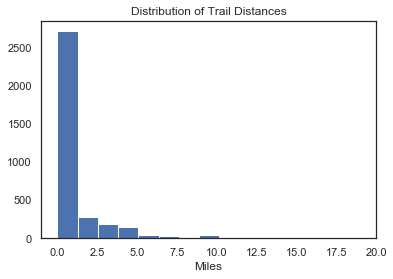

In [205]:
plt.hist(wash_trls['distance'], bins=100)
plt.xlim(-1, 20)
plt.title('Distribution of Trail Distances')
plt.xlabel('Miles')
plt.show()

In [212]:
#repeating a similar process for the descent column
wash_trls.loc[wash_trls['descent'] == 'BUMMER', 'descent'] = np.nan
wash_trls['descent_ft'] = wash_trls['descent'].str.replace('ft', '').str.replace('-', '').str.replace(',', '').str.strip()

In [213]:
wash_trls['descent_ft'] = wash_trls['descent_ft'].astype('float')

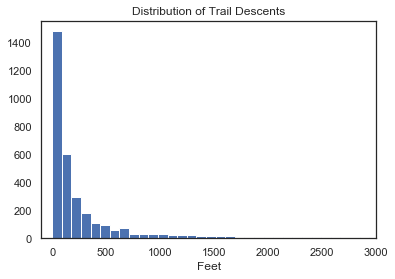

In [216]:
plt.hist(wash_trls['descent_ft'], bins=100)
plt.xlim(-100, 3000)
plt.title('Distribution of Trail Descents')
plt.xlabel('Feet')
plt.show()

## EDA

In [217]:
#reordering the columns and only keeping the cleaned columns in the trails df
trails = wash_trls[[
    'trail_url', 
    'trail', 
    'trail_center', 
    'rating', 
    'trail_rating',
    'total_reviews',
    'difficulty', 
    'distance', 
    'descent_ft']]

In [218]:
trails.head()

,trail_url,trail,trail_center,rating,trail_rating,total_reviews,difficulty,distance,descent_ft
0,https://www.trailforks.com/trails/1394-esmeral...,#1394 Esmeralda Basin Trail,Teanaway,100/100 with 3 votes,100.0,3,Very Difficult / Black Diamond,4.00,963.0
1,https://www.trailforks.com/trails/4427-travers...,#4427 Traverse to Coyote Wall,Syncline,70/100 with 2 votes,70.0,2,Intermediate / Blue Square,0.82,30.0
2,https://www.trailforks.com/trails/lil-beaver/,'Lil Beaver,Henry's Ridge,90/100 with 2 votes,90.0,2,Intermediate / Blue Square,0.56,183.0
3,https://www.trailforks.com/trails/lil-red/,'Lil Red,Henry's Ridge,80/100 with 1 vote,80.0,1,Easy / Green Circle,0.16,43.0
4,https://www.trailforks.com/trails/view-149737/,...,Beacon Hill,0/100,0.0,0,Easy / Green Circle,0.04,14.0


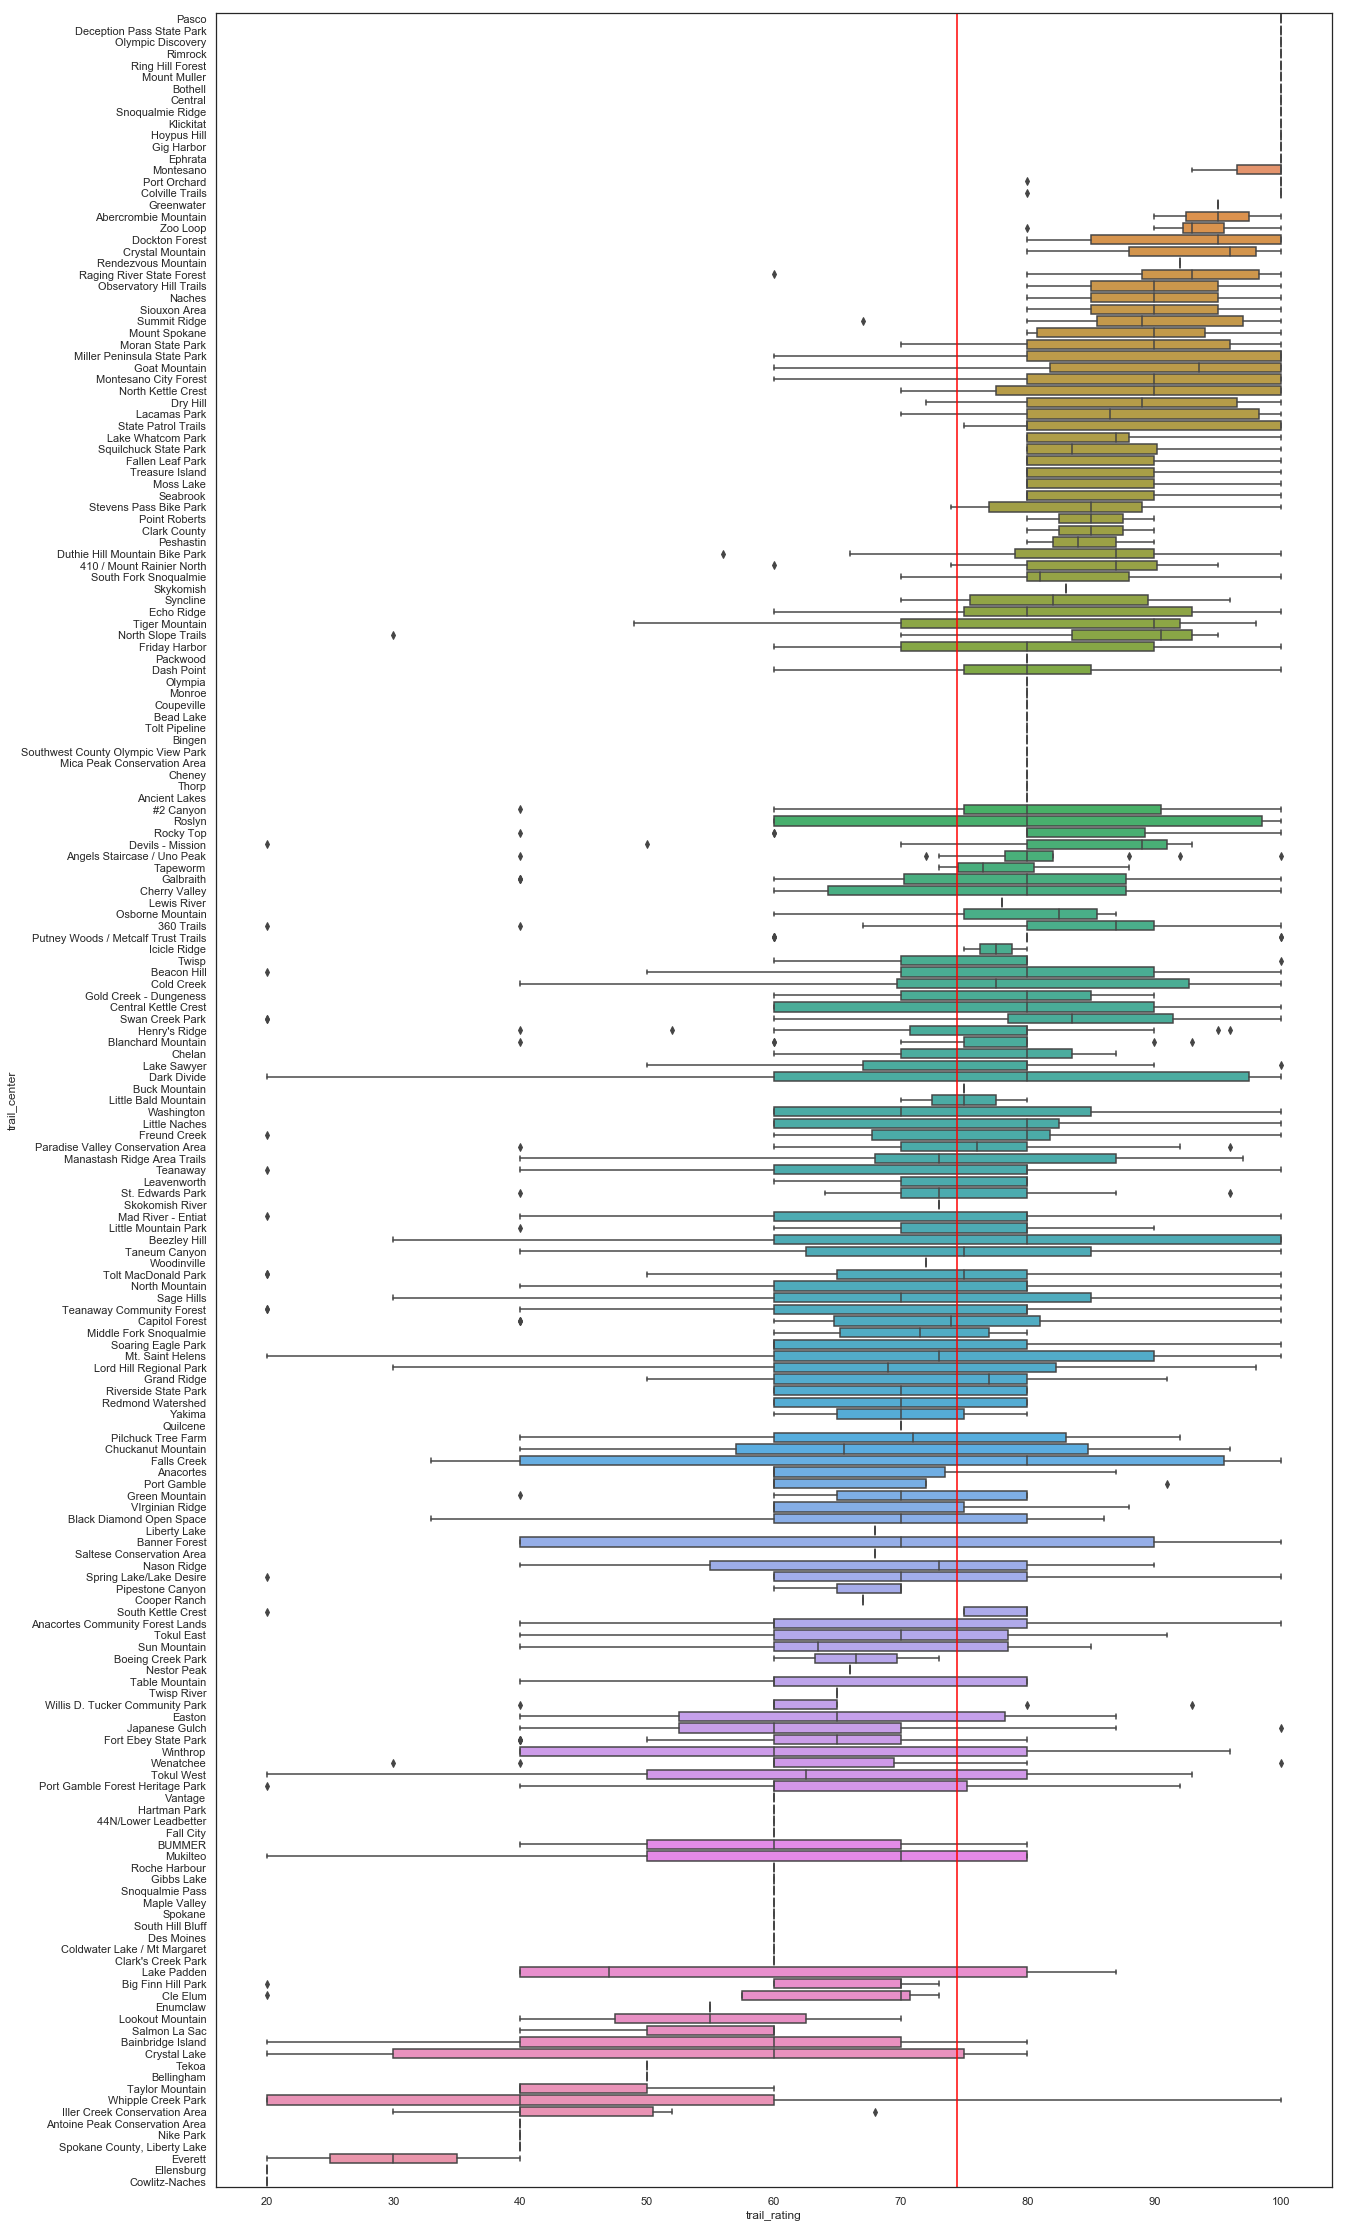

In [248]:
hold = trails.loc[trails['total_reviews'] > 0]
trail_heads = hold.groupby('trail_center')['trail_rating'].aggregate(np.mean).sort_values(ascending=False)

plt.figure(figsize=(20,40))
sns.boxplot(
    y=hold['trail_center'],
    x=hold['trail_rating'],
    order=trail_heads.index
)
plt.axvline(hold['trail_rating'].mean(), color='red')
plt.show()

Trailforks is definitely not an exhaustive list of all trails in a specific area, but it is probably the the largest compilation for mtb trails than any other site. Looking at the boxplots above we can see that the average trail rating in Washington is around 75/100 which is pretty good!

An interesting next step would be to take the break out by trail center and start comparing the ratings to the other statistics available. That way we could start to build a picture of what makes a trail system successful. With that information we can start to expand and compare this to other states and the world.

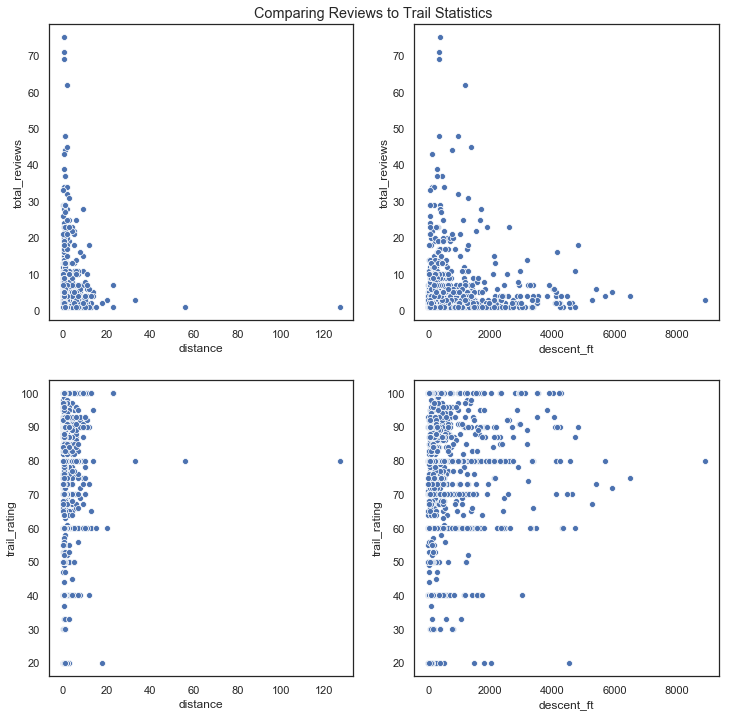

In [249]:
#removing unreviewed trails
hold = trails.loc[trails['total_reviews'] > 0]

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.scatterplot(
    x='distance',
    y='total_reviews',
    data=hold
)

plt.subplot(2,2,2)
sns.scatterplot(
    x='descent_ft',
    y='total_reviews',
    data=hold
)

plt.subplot(2,2,3)
sns.scatterplot(
    x='distance',
    y='trail_rating',
    data=hold
)

plt.subplot(2,2,4)
sns.scatterplot(
    x='descent_ft',
    y='trail_rating',
    data=hold
)
plt.suptitle('Comparing Reviews to Trail Statistics', y=0.9)
plt.show()

A trails rating does not seem to be impacted by it's distance, but that does affect the number of reviewers, which is expected. The same is the case for trails with big descents, but the rating does seem to be impacted. People like shorter trails with longer descents, that much atleast is clear.

## Conclusions

This scraper worked really well with very few BUMMER rows. The data that returned BUMMER for distance and descent was due to it being stored in the table in different classes and td positions. Some of the distance and descent td's did not have a class and were just dropped in as text. If the td did not have a class then it was shoved in underneath the previous td node. The fact that it was in an unpredictable space made it difficult to nail down. The solution above was able to get a vast majority of the data.

At the end of the day this is a very simple implementation of a scrapy spider. Next steps here would be to iterate over all trails on the website and move into each trails page to grab more detailed data including average user ride time, world ranking of the trail, descriptions, etc. There is a lot more data in each trails specific page.